In [124]:
import numpy as np

In [125]:
import scipy.special as sp

In [126]:
import scipy.constants as cs

In [127]:
import math as mt

In [128]:
import matplotlib.pyplot as plt

In [129]:
from cpw_resonator import cpw_resonator as cpw

In [130]:
from qkit.analysis.circle_fit.circuit import reflection_singleport as rf_p

In [131]:
from qkit.analysis.circle_fit.utilities import dBm2Watt

In [132]:
import JPA as JPA

In [133]:
import matplotlib.cm as cm
import matplotlib.colors as col

In [134]:
filepath = 'C:/Users/Patrick/Documents/Python/pictures'

In [135]:
font = {'weight' : 'normal', 'size' : 22}
plt.rc('font', **font)
labelsize=28

In [136]:
%matplotlib inline

In [137]:
phi_0 = JPA.phi_0

In [138]:
R_k = cs.h/cs.e**2.

In [139]:
w = 10.e-6
g = 5.e-6

In [140]:
l = 2800.e-6

In [141]:
Cc = 2.e-15
#Cc = 7.47e-15

In [142]:
res = cpw(w,g,l,Cc)

In [143]:
res.get_values()

Ll = 4.13667313305e-07 H/m
Cl = 1.73462871349e-10 F/m
distributed:
L = 1.15826847725e-09 H
C = 4.85696039776e-13 F
R = 0.23842444246 Ohm
lumped element:
Lr = 9.38857064728e-10 H
Cr = 2.42848019888e-13 F
Rr = 14979288.7616 Ohm

Q_int = 117647.058824 
Q_ext = 18410.7607299 
Q_load = 15919.4955327 

f_res = 10540303324.0 GHz
f_resc = 10497168584.8 GHz 


In [144]:
1/((res._wresc*res._Cc)**2*50.)

1149386.0545213067

In [145]:
res.imp_Al_CPW()

48.834004323346477

In [146]:
res._Rstar

1140047.8956361406

In [147]:
Rr = res._Rr

In [148]:
n = 50000

In [149]:
E_gamma = cs.hbar*2*np.pi*8.84e9*n

In [150]:
E_gamma

2.92872295768e-19

In [151]:
E_m = E_gamma/2

In [152]:
I_m = np.sqrt(2*E_m/(res._L))

In [153]:
print I_m

1.59013694227e-05


In [154]:
Qi = 213000

In [155]:
Rr2 = Qi/(2.*np.pi*res._fresc*res._Cr)

In [156]:
power_dBm = np.arange(-120.,-75.,1)

In [157]:
power = dBm2Watt(power_dBm)

In [158]:
p = dBm2Watt(-80.)

In [159]:
I = np.sqrt(2*p/Rr2)

In [160]:
I

1.2263614765875179e-09

In [161]:
L = JPA.phi_0/(2*np.pi*I)

In [162]:
1/(2*np.pi*np.sqrt((res._Lr+L)*(res._Cc+res._Cr)))

619804656.88443673

In [163]:
print L

2.68359681855e-07


In [164]:
res._Cc

2e-15

In [165]:
N = 3.
Ic = 4.0e-6
max_wallraff_multi = np.max(JPA.fres_Wallraff_multi(res._Ll,res._Cl,l,Ic, 0, res._Cc, N))

Ljs = phi_0/(2.*np.pi*2*Ic)*10**9
print 'LJs = {}'.format(str(Ljs))
Lj = N*phi_0/(2.*np.pi*2*Ic)
print 'LJ =', Lj*10**9
gamma = Lj/(res._Ll*l)
print 'gamma = ', gamma

print 'tau =', 2.*np.pi*max_wallraff_multi/res._Qload*10**(-6), 'MHz'

alpha_0 = np.pi**2.*2.*np.pi*max_wallraff_multi*res._Z0/R_k
alpha = alpha_0*(gamma/np.cos(0*np.pi))**3
print alpha/(2.*np.pi)


print max_wallraff_multi

LJs = 0.041138246962
LJ = 0.123414740886
gamma =  0.106551065931
tau = 3.74558548601 MHz
219470.953546
9490064115.07


In [166]:
res.get_values()

Ll = 4.13667313305e-07 H/m
Cl = 1.73462871349e-10 F/m
distributed:
L = 1.15826847725e-09 H
C = 4.85696039776e-13 F
R = 0.23842444246 Ohm
lumped element:
Lr = 9.38857064728e-10 H
Cr = 2.42848019888e-13 F
Rr = 14979288.7616 Ohm

Q_int = 117647.058824 
Q_ext = 18410.7607299 
Q_load = 15919.4955327 

f_res = 10540303324.0 GHz
f_resc = 10497168584.8 GHz 


In [167]:
f_data = np.arange(10.0e9,11.e9,1e5)

In [168]:
f_data.shape

(10000,)

In [169]:
res.S11(f_data)

In [170]:
res._S11.shape

(10000,)

In [171]:
res._freq = f_data

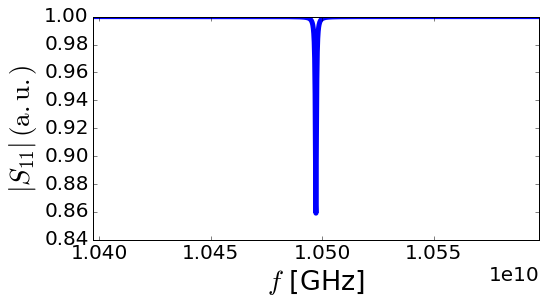

In [172]:
res.plot_S11( log = False)

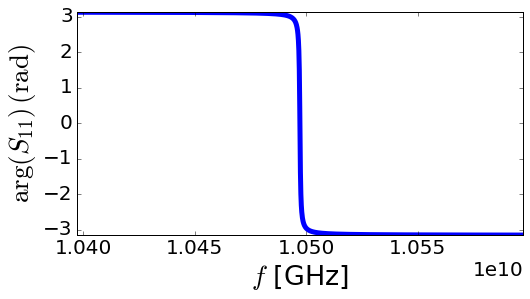

In [173]:
res.plot_S11( mag = False)

(10.445, 10.55)

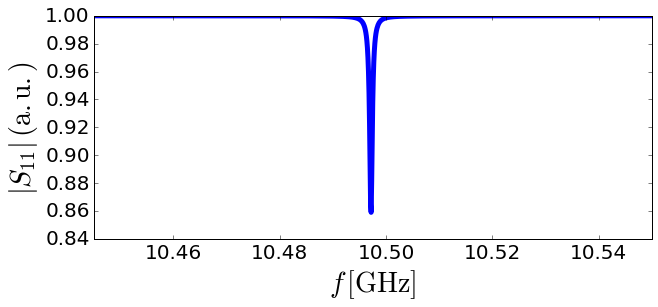

In [174]:
fig, axes = plt.subplots(figsize = (10,4))
axes.plot(f_data/10**9., np.absolute(res._S11), color = "blue", lw = 5)
axes.set_xlabel('$f\,[\mathrm{GHz}]$', fontsize = labelsize )
axes.set_ylabel(r'$|S_{11}| \, (\mathrm{a.u.})$', fontsize = labelsize )
axes.set_xlim(10.445,10.55)

In [175]:
res.S11_decay(f_data)

In [176]:
Z_in = res.Z_in(f_data)

In [177]:
Z_in_res = res.Z_in_res(f_data) 

(-2000, 20000)

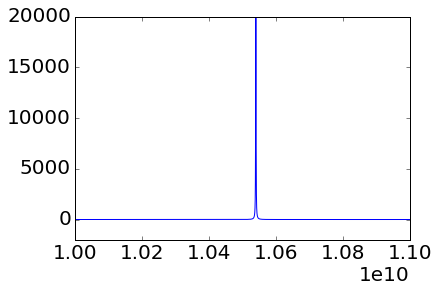

In [178]:
plt.plot(f_data, Z_in)
plt.ylim(-2000,20000)

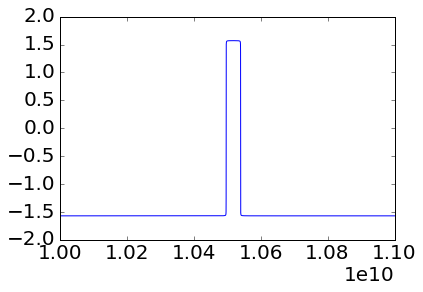

In [179]:
plt.plot(f_data, np.unwrap(np.angle(Z_in), np.pi/4.))

(-20000, 10000)

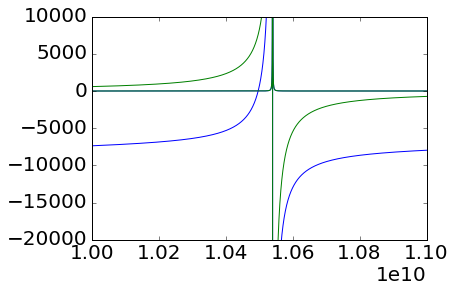

In [180]:
plt.plot(f_data, Z_in.real, color = 'blue')
plt.plot(f_data, Z_in.imag, color = 'blue')
plt.plot(f_data, Z_in_res.real, color = 'green')
plt.plot(f_data, Z_in_res.imag, color = 'green')
plt.ylim(-20000,10000)

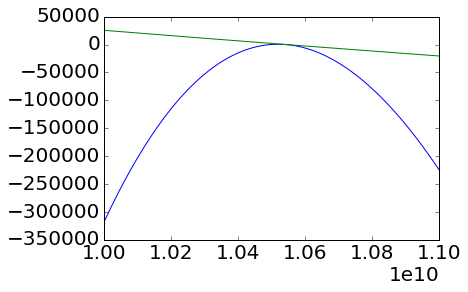

In [181]:
plt.plot(f_data, Z_in.imag/Z_in.real)
plt.plot(f_data, Z_in_res.imag/Z_in_res.real )

In [182]:
S11_theory = (res._Z0-res.Z_in(f_data))/(res._Z0+res.Z_in(f_data))

In [183]:
Z0 = 40.

In [184]:
S11_complexe = (Z0**2.-Z_in.real**2.-Z_in.imag**2.)/((Z0+Z_in.real)**2.+Z_in.imag**2.)-1.j*2.*Z0*Z_in.imag/((Z0+Z_in.real)**2.+Z_in.imag**2.)

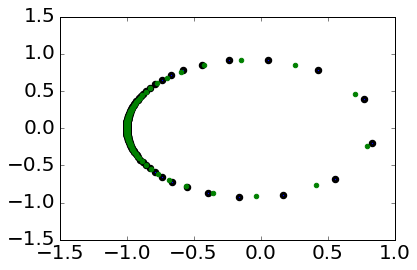

In [185]:
plt.scatter(S11_theory.real, S11_theory.imag, lw = 3.)
plt.scatter(S11_complexe.real, S11_complexe.imag, color = 'green', lw = 1.)

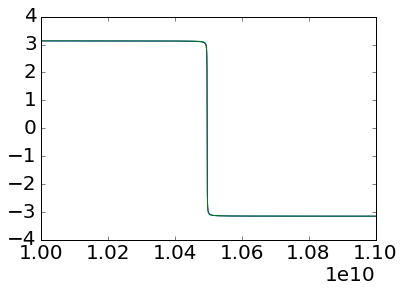

In [186]:
plt.plot(f_data, np.unwrap(np.angle(S11_theory)))
plt.plot(f_data, np.unwrap(np.angle(S11_complexe)))

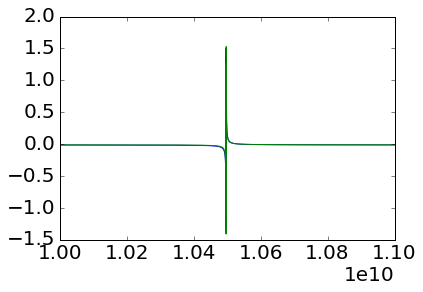

In [187]:
plt.plot(f_data, np.arctan(S11_theory.imag/S11_theory.real))
plt.plot(f_data, np.arctan(S11_complexe.imag/S11_complexe.real))

# lumped element (series LRC):

In [188]:
frq = np.arange(5e9, 15.e9, 1.e5)

In [189]:
Z_in_LRC = res.Z_in_LRC_S(frq, res._Lr, res._Cr, 1/res._Rr)

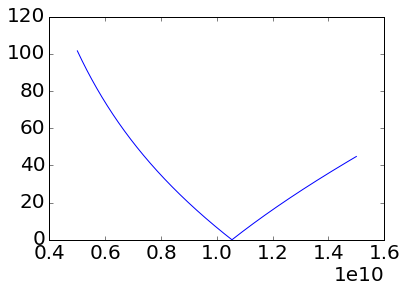

In [190]:
plt.plot(frq, np.sqrt(Z_in_LRC.real**2.+Z_in_LRC.imag**2.))
#plt.ylim(0,10)

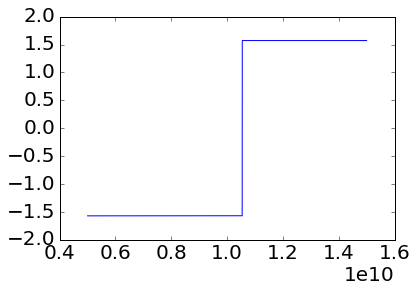

In [191]:
plt.plot(frq, np.angle(Z_in_LRC))

In [192]:
Cc = 0.01*res._Cr
#Lc = 0.001*res._Lr

In [193]:
Z_CC = 1./(1.j*2.*np.pi*frq*Cc)
#Z_CC = 1.j*2.*np.pi*frq*Lc

In [194]:
Z_input_LRC_Series = Z_CC+Z_in_LRC

In [195]:
S11_LRC = res.S11_LRC(frq, Z_input_LRC_Series, 50. )

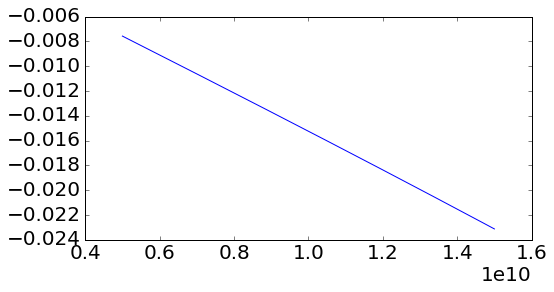

In [196]:
res.plot(frq, np.unwrap(np.angle(S11_LRC)))

# lumped element (parallel LRC)

In [197]:
fr = 1./(2.*np.pi*np.sqrt(res._Lr*res._Cr))

In [198]:
print fr

10540303324.0


In [199]:
Cc = 7.5*10**-15

In [200]:
res = cpw(w,g,l,Cc)

In [201]:
freq1 = np.arange(2e9,20e9,1.e5)
freq = np.arange(10.30e9,10.70e9,5.e4)

In [202]:
#res._Rr

In [203]:
'''lumped element parallel LRC with different losses'''

'lumped element parallel LRC with different losses'

In [204]:
R1 = 40000

In [205]:
Z_LRC_P = res.Z_in_LRC_P(freq1, res._Lr, res._Cr, R1)

In [206]:
1./np.sqrt(res._Lr*res._Cr)*R1*res._Cr

643.32071414587369

In [207]:
'''input impedance for different coupling capacitors'''
Z_LRC_C = []
Z_LRC_CC = []
R_G = []
fr_c = []
Z_LRC_RC = []
for i in range(5):
    res_c = cpw(w,g,l,2.e-15+1.*i*10**(-15))
    Z_LRC_C.append(res_c.Z_in_LRC_PC(freq, res_c._Lr, res_c._Cr, res_c._Rr, res_c._Rstar, res_c._C_star))
    Z_LRC_CC.append(res_c.Z_in_LRC_C(freq, res_c._Lr, res_c._Cr, res_c._Rr, res_c._Cc))
    Z_LRC_RC.append(res_c.Z_in_LRC_C(freq, res_c._Lr, res_c._Cr, res_c._Rr/((i+1)*43.5), Cc))
    R_G.append(res_c._Rr*res_c._Rstar/(res_c._Rr+res_c._Rstar))
    fr_c.append(res_c._fresc)

In [208]:
Z_in_LRC_P = []
S11_LRC_P = []
S11_LRC_P2 = []
R = []
Z_coupled = []
Z = []
for i in range(5):
    
    R.append(res._Rr/((i+1)*43.5))
    Z_in_LRC_P.append(res.Z_in_LRC_P(freq, res._Lr, res._Cr, R[i] ))
    #plt.figure(figsize = (8,4))
    #fig, axes = plt.subplots(figsize = (8,4))
    #axes.plot(freq, Z_in_LRC_P.imag)
    #axes.set_ylim(-100000,100000)
    Cc = 7.5e-15
    Z_CC = 1./(1.j*2*np.pi*freq*Cc)
    Z.append(Z_CC+Z_in_LRC_P[i])
    print Cc
    
    Z_coupled.append(res.Z_in_LRC_PC(freq, res._Lr, res._Cr, R[i], res._Rstar, res._C_star))
    S11_LRC_P.append(res.S11_LRC(freq, Z[i], 50. ))
    S11_LRC_P2.append(res.S11_LRC(freq, Z_coupled[i], res._Rstar ))
    wresc = 1/np.sqrt(res._Lr*(res._Cr+Cc))
    Q_ext = res.Q_ext(wresc, Cc, own = False)
    print 'Q_ext = {}'.format(Q_ext)
    Q_int = wresc*R[i]*res._Cr
    print 'Q_int = {}'.format(Q_int)
    ratio = Q_ext/Q_int
    print 'Q_ext/Q_int = {}'.format(str(ratio)) 

    
    
    
    


7.5e-15
Q_ext = 1365.47329177
Q_int = 5454.62229177
Q_ext/Q_int = 0.250333243758
7.5e-15
Q_ext = 1365.47329177
Q_int = 2727.31114588
Q_ext/Q_int = 0.500666487516
7.5e-15
Q_ext = 1365.47329177
Q_int = 1818.20743059
Q_ext/Q_int = 0.750999731274
7.5e-15
Q_ext = 1365.47329177
Q_int = 1363.65557294
Q_ext/Q_int = 1.00133297503
7.5e-15
Q_ext = 1365.47329177
Q_int = 1090.92445835
Q_ext/Q_int = 1.25166621879


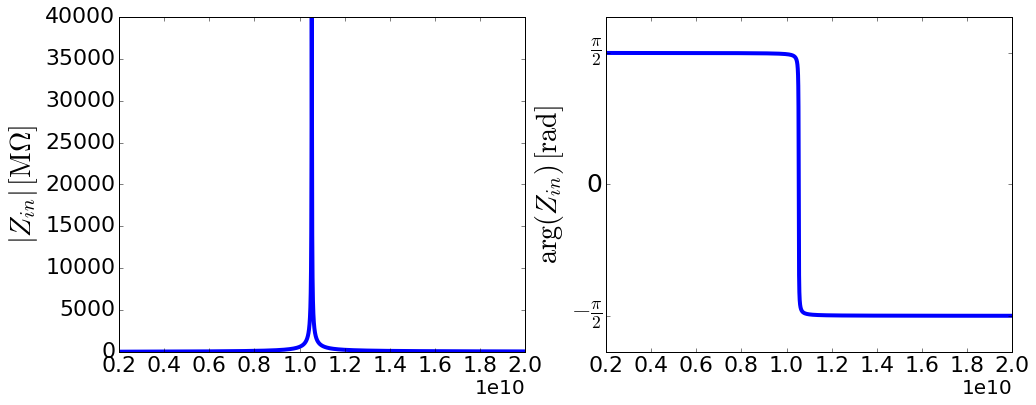

In [209]:
'''input impedance magnitude and phase for different coupling capacitors'''
fig, axes = plt.subplots(nrows = 1, ncols=2,figsize = (16,6))
axes[0].plot(freq1, np.absolute(Z_LRC_P), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[1].plot(freq1, np.unwrap(np.angle(Z_LRC_P)), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[0].set_ylabel(r'$|Z_{in}|\,\mathrm{[M \Omega]}$', fontsize = labelsize)
axes[1].set_ylabel(r'$\arg (Z_{in})\,[\mathrm{rad}]$', fontsize = labelsize)
#axes[0].set_xlabel(r'$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize)
#axes[1].set_xlabel(r'$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize)
#axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#axes[0].set_xlim(-12,4)
#axes[1].set_xlim(-12,4)
#axes[0].set_ylim(0,1.0)
#axes[1].set_ylim(-2.0,2.0)
axes[0].tick_params(axis='x', which='major', labelsize=22)
axes[1].tick_params(axis='x', which='major', labelsize=22)
axes[0].tick_params(axis='y', which='major', labelsize=22)
axes[1].tick_params(axis='y', which='major', labelsize=25)
plt.setp(axes[1], yticks=[-np.pi/2, 0., np.pi/2.], yticklabels = [r'$-\frac{\pi}{2}$', '0',  r'$\frac{\pi}{2}$'])

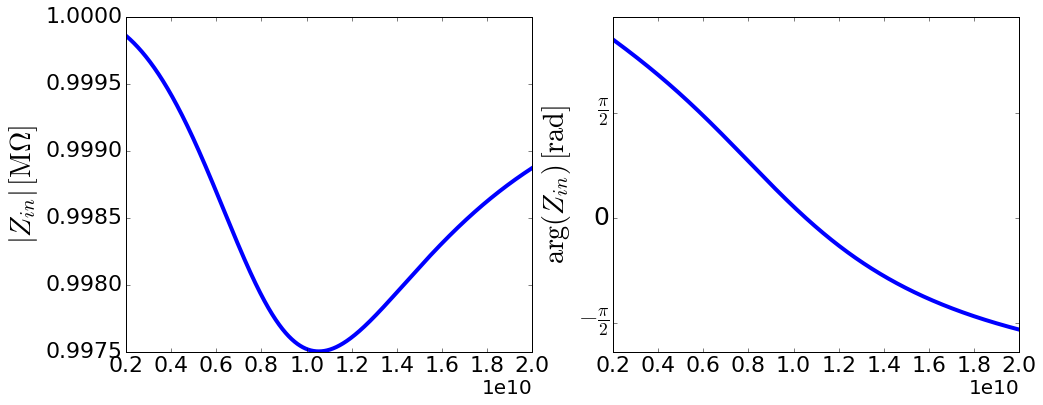

In [210]:
'''input impedance magnitude and phase for different coupling capacitors'''
fig, axes = plt.subplots(nrows = 1, ncols=2,figsize = (16,6))
Gamma = (Z_LRC_P.real-50.+1.j*Z_LRC_P.imag)/(Z_LRC_P.real+50.+1.j*Z_LRC_P.imag)
axes[0].plot(freq1, np.absolute(Gamma), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[1].plot(freq1, np.unwrap(np.angle(Gamma)), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[0].set_ylabel(r'$|Z_{in}|\,\mathrm{[M \Omega]}$', fontsize = labelsize)
axes[1].set_ylabel(r'$\arg (Z_{in})\,[\mathrm{rad}]$', fontsize = labelsize)
#axes[0].set_xlabel(r'$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize)
#axes[1].set_xlabel(r'$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize)
#axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#axes[0].set_xlim(-12,4)
#axes[1].set_xlim(-12,4)
#axes[0].set_ylim(0,1.0)
#axes[1].set_ylim(-2.0,2.0)
axes[0].tick_params(axis='x', which='major', labelsize=22)
axes[1].tick_params(axis='x', which='major', labelsize=22)
axes[0].tick_params(axis='y', which='major', labelsize=22)
axes[1].tick_params(axis='y', which='major', labelsize=25)
plt.setp(axes[1], yticks=[-np.pi/2, 0., np.pi/2.], yticklabels = [r'$-\frac{\pi}{2}$', '0',  r'$\frac{\pi}{2}$'])

In [211]:
Z_CC = 1./(1.j*2.*np.pi*freq*Cc)

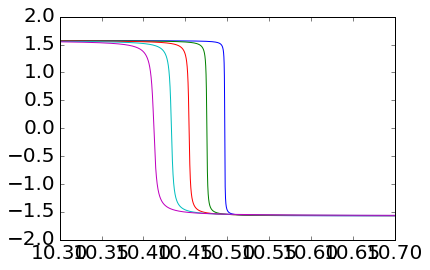

In [212]:
for i in range(5):
    plt.plot(freq/10**9., np.angle(Z_LRC_C[i]))

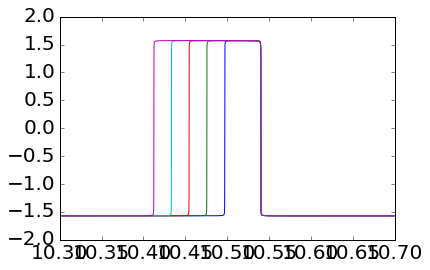

In [213]:
for i in range(5):
    plt.plot(freq/10**9., np.unwrap(np.angle(Z_LRC_CC[i])))
    #plt.xlim(10.540,10.541)

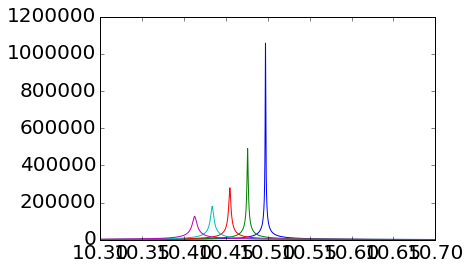

In [214]:
for i in range(5):
    plt.plot(freq/10**9., np.absolute(Z_LRC_C[i]))

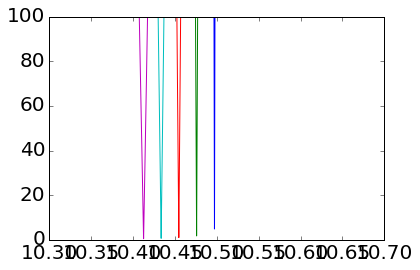

In [215]:
for i in range(5):
    plt.plot(freq/10**9., np.absolute(Z_LRC_CC[i]))
    plt.ylim(0,100)

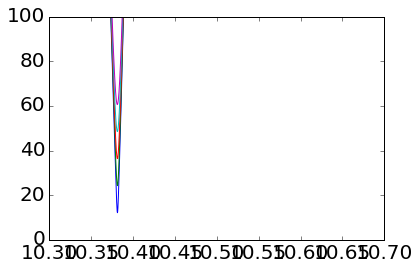

In [216]:
for i in range(5):
    plt.plot(freq/10**9., np.absolute(Z_LRC_RC[i]))
    plt.ylim(0,100)

In [217]:
colors = ['blue', 'green', 'red', 'cyan', 'purple']

In [218]:
z = Z_CC+Z_in_LRC_P[0]

In [219]:
fres_c = 1./(2.*np.pi*np.sqrt(res._Lr*(res._Cr+ res._C_star)))
fres_c2 = 1./(2.*np.pi*np.sqrt(res._Lr*(res._Cr+ res._Cc)))

In [220]:
res_cc = cpw(w,g,l,7.5e-15)

In [221]:
Z_C = res_cc.Z_in_LRC_PC(freq, res_cc._Lr, res_cc._Cr, res_cc._Rr, res_cc._Rstar, res_cc._C_star)

(0, 10000)

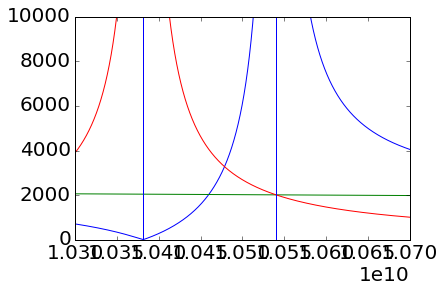

In [222]:
plt.plot(freq, np.absolute(z))
plt.plot(freq, np.absolute(Z_CC))
plt.plot(freq, np.absolute(Z_C), color = 'red')
plt.axvline(fr)
plt.axvline(fres_c)
plt.axvline(fres_c2)
plt.ylim(0,10000)

In [223]:
freq[np.argmin(np.absolute(z))]

10381200000.0

(-1000, 1000)

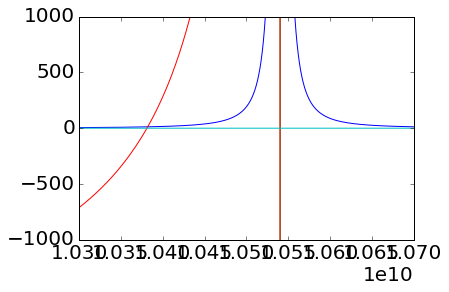

In [224]:
plt.plot(freq, z.real)
plt.plot(freq, Z_in_LRC_P[0].imag)
plt.plot(freq, z.imag)
plt.plot(freq, Z_CC)
plt.ylim(-1000,1000)

In [225]:
S = (z.real**2.+z.imag**2.-50.**2.)/((z.real+50.)**2.+z.imag**2.)+1.j*(2*50*z.imag)/((z.real+50.)**2.+z.imag**2.)

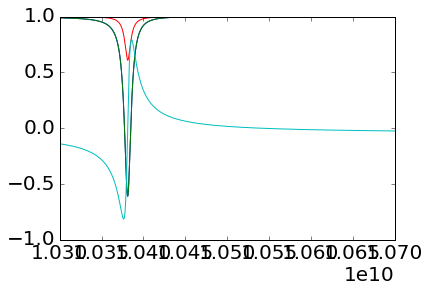

In [226]:
plt.plot(freq, (Z_CC+Z_in_LRC_P[0]-50.)/(Z_CC+Z_in_LRC_P[0]+50.))
plt.plot(freq, S)
plt.plot(freq, np.absolute(S))
plt.plot(freq, S.imag)

In [227]:
z1 = Z_in_LRC_P[0]

In [228]:
S1 = (z1.real**2.+z1.imag**2.-50.**2.)/((z1.real+50.)**2.+z1.imag**2.)+1.j*(2*50*z1.imag)/((z1.real+50.)**2.+z1.imag**2.)

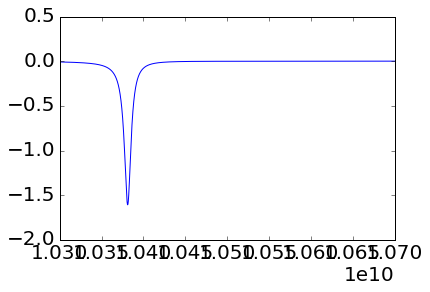

In [229]:
plt.plot(freq, S-S1)

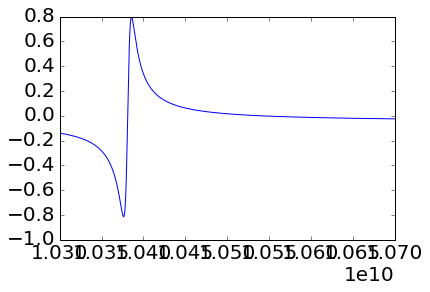

In [230]:
plt.plot(freq, (2*50*z.imag)/((z.real+50.)**2.+z.imag**2.))

In [231]:
np.min((z.real+50.)**2.+z.imag**2.)

3860.2677565127806

In [232]:
np.min((z.real**2.+z.imag**2.-50.**2.))

-2352.7379280235955

(-3000, 10000)

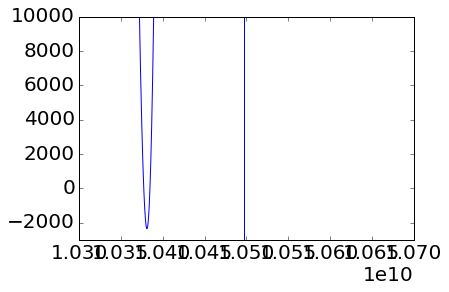

In [233]:
plt.plot(freq, (z.real**2.+z.imag**2.-50.**2.))
plt.axvline(fr_c[0])
plt.ylim(-3000, 10000)

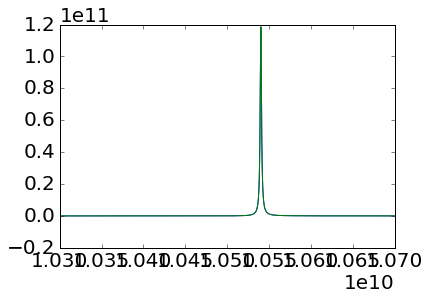

In [234]:
plt.plot(freq, (z.real**2.+z.imag**2.-50.**2.))
plt.plot(freq, (z.real+50.)**2.+z.imag**2.)

In [235]:
res._C_star

7.495377020442168e-15

In [236]:
Z_norton = res.Z_in_Norton(freq, res._Lr, res._Cr, res._Rr, res._C_star)

(10360000000.0, 10600000000.0)

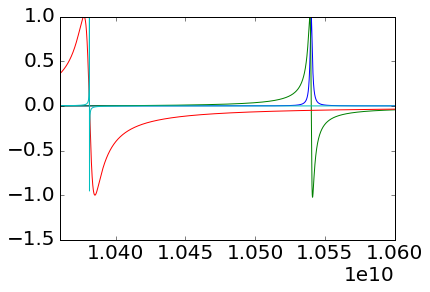

In [237]:
plt.plot(freq, z.real/np.max(z.real))
plt.plot(freq, z.imag/np.max(z.imag))
plt.plot(freq, Z_C.imag/np.max(Z_C.imag))
plt.plot(freq, Z_norton.imag/np.max(Z_norton.imag))
plt.xlim(10.36e9, 10.60e9)

(10360000000.0, 10600000000.0)

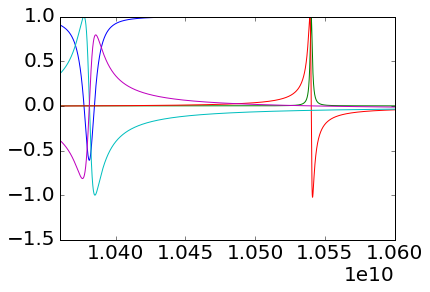

In [238]:
plt.plot(freq,(z.real**2.+z.imag**2.-50.**2.)/((z.real+50.)**2.+z.imag**2.))
plt.plot(freq, z.real/np.max(z.real))
plt.plot(freq, z.imag/np.max(z.imag))
plt.plot(freq, Z_C.imag/np.max(Z_C.imag))
plt.plot(freq, (2*50*z.imag)/((z.real+50.)**2.+z.imag**2.))
plt.xlim(10.36e9, 10.60e9)

In [239]:
#plt.plot(freq, np.absolute((R_star-(Z_coupled[4]))/(R_star + np.array(Z_coupled[4]))))
#plt.plot(freq, np.absolute((50.-(Z_CC+np.array(Z_in_LRC_P[4])))/(50. + np.array(Z_CC+Z_in_LRC_P[4]))))

In [245]:
c = cm.rainbow(np.linspace(0,1,10))

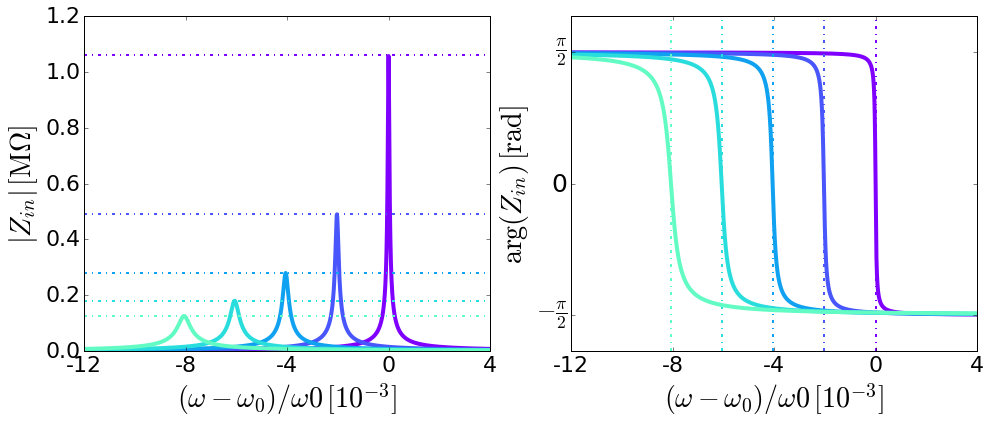

In [246]:
'''input impedance magnitude and phase for different coupling capacitors'''
fig, axes = plt.subplots(nrows = 1, ncols=2,figsize = (16,6))
for i in range(5):
    axes[0].plot((freq-fr_c[0])/(fr_c[0]*10**(-3)), np.absolute(Z_LRC_C[i])/10**6., label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4., color = c[i])
    axes[1].plot((freq-fr_c[0])/(fr_c[0]*10**(-3)), np.unwrap(np.angle(Z_LRC_C[i])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4., color = c[i])
    axes[0].axhline(R_G[i]/10**6., ls = '-.', lw = 2., color = c[i])
    axes[1].axvline((fr_c[i]-fr_c[0])/(fr_c[0]*10**(-3)), ls = '-.', lw = 2., color = c[i])
axes[0].set_ylabel(r'$|Z_{in}|\,\mathrm{[M \Omega]}$', fontsize = labelsize)
axes[1].set_ylabel(r'$\arg (Z_{in})\,[\mathrm{rad}]$', fontsize = labelsize)
axes[0].set_xlabel(r'$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize)
axes[1].set_xlabel(r'$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize)
#axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].set_xlim(-12,4)
axes[1].set_xlim(-12,4)
#axes[0].set_ylim(0,1.0)
axes[1].set_ylim(-2.0,2.0)
axes[0].tick_params(axis='x', which='major', labelsize=22)
axes[1].tick_params(axis='x', which='major', labelsize=22)
axes[0].tick_params(axis='y', which='major', labelsize=22)
axes[1].tick_params(axis='y', which='major', labelsize=25)
plt.setp(axes, xticks=[-12,-8,-4,0,4], xticklabels = ['-12','-8', '-4', '0', '4'])
#plt.setp(axes[1], xticks=[-12,-8,-4,0,4], yticklabels = ['-12','-8', '-4', '0', '4'])
plt.setp(axes[1], yticks=[-np.pi/2, 0., np.pi/2.], yticklabels = [r'$-\frac{\pi}{2}$', '0',  r'$\frac{\pi}{2}$'])

In [247]:
fig.savefig(str('input_impedance_diff_coupling.pdf'), dpi = 400, bbox_inches='tight')

In [243]:
#S11_LRC_P = res.S11_LRC(freq, Z_coupled, 50. )

In [244]:
fr = res._fres

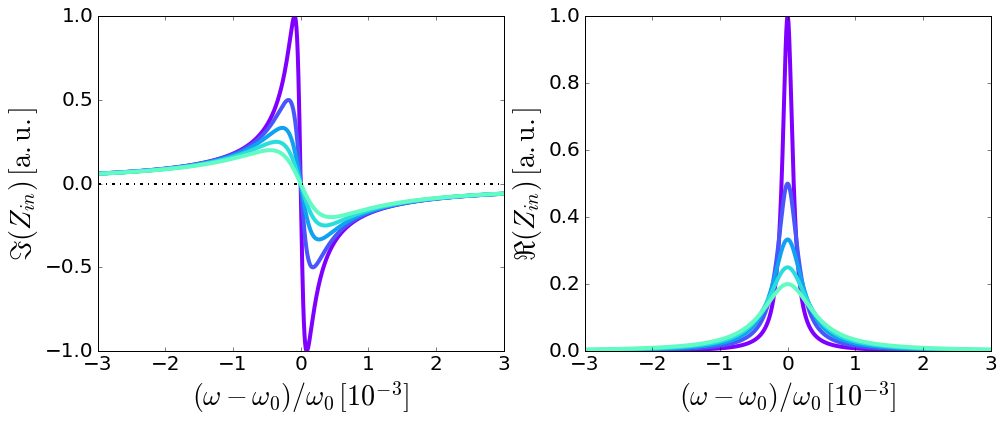

In [248]:
'''imaginary and real part input impedance (uncoupled resonator) different internal losses R'''
fig, axes = plt.subplots(1,2, sharex=True, figsize = (16,6))
norm = np.max(Z_in_LRC_P[0].imag)
norm_amp = np.max(Z_in_LRC_P[0].real)
for i in range(5):
    axes[0].plot((freq-fr)/(fr*10**(-3)), Z_in_LRC_P[i].imag/norm, lw = 4., color = c[i])
    axes[1].plot((freq-fr)/(fr*10**(-3)), Z_in_LRC_P[i].real/norm_amp, label = 'R = {}'.format(R[i]), lw = 4., color = c[i])
    #axes.axhline(R[i], ls = '-', lw = 1., color = 'black')
#axes.set_title(r'imaginary part input impedance')
axes[1].set_xlabel('$(\omega-\omega_0)/\omega_0 \, [10^{-3}]$', fontsize = labelsize )
axes[0].set_xlabel('$(\omega-\omega_0)/\omega_0 \, [10^{-3}]$', fontsize = labelsize )
axes[0].set_ylabel(r'$\Im(Z_{in}) \, [\mathrm{a.u.}]$', fontsize = labelsize )
axes[1].set_ylabel(r'$\Re(Z_{in})\, [\mathrm{a.u.}]$' ,  fontsize = labelsize )
#axes[0].set_ylim(-0.2,0.2)
axes[0].set_xlim(-0.5,0.5)
axes[1].set_xlim(-3.0,3.0)
axes[0].axhline(0, ls = '-.', lw = 2., color = 'black')
#plt.setp(axes, xticks=[10.53, 10.54, 10.55], xticklabels = ['10.53', '10.54', '10.55'])
#axes[0].set_xticks(range(3),[10.53,10.54,10.55], color = 'red')

In [249]:
fig.savefig(str('input_impedance_uncoupled_diff_loss.pdf'), dpi = 400, bbox_inches='tight')

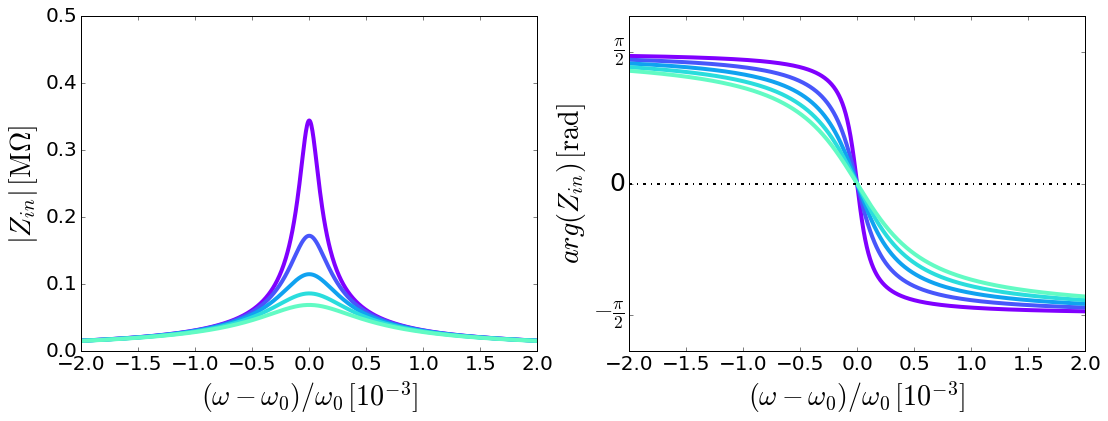

In [250]:
#uncoupled system: inductively dominated below f_0 and capacitively dominated above f_0

fig, axes = plt.subplots(1,2, sharex=True, figsize = (18,6))
for i in range(5):
    axes[0].plot((freq-fr)/(fr*10**(-3)), np.absolute(Z_in_LRC_P[i])/10**6., lw = 4., color = c[i])
    axes[1].plot((freq-fr)/(fr*10**(-3)), np.arctan(Z_in_LRC_P[i].imag/Z_in_LRC_P[i].real), label = 'R = {}'.format(R[i]), lw = 4., color = c[i])
    #axes.axhline(R[i], ls = '-', lw = 1., color = 'black')
#axes.set_title(r'imaginary part input impedance')
axes[1].set_xlabel('$(\omega-\omega_0)/\omega_0 \, [10^{-3}]$', fontsize = labelsize )
axes[0].set_xlabel('$(\omega-\omega_0)/\omega_0 \, [10^{-3}]$', fontsize = labelsize )
axes[0].set_ylabel(r'$|Z_{in}| \, [\mathrm{M\Omega}]$', fontsize = labelsize )
axes[1].set_ylabel(r'$arg(Z_{in})\,[\mathrm{rad}]$' ,  fontsize = labelsize )
axes[0].set_ylim(0,0.5)
axes[0].set_xlim(-0.5,0.5)
axes[1].set_xlim(-2.0,2.0)
axes[1].axhline(0, ls = '-.', lw = 2., color = 'black')
axes[1].tick_params(axis='y', which='major', labelsize=25)
plt.setp(axes[1], yticks=[-np.pi/2, 0., np.pi/2.], yticklabels = [r'$-\frac{\pi}{2}$', '0',  r'$\frac{\pi}{2}$'])


(-2.0, 2.0)

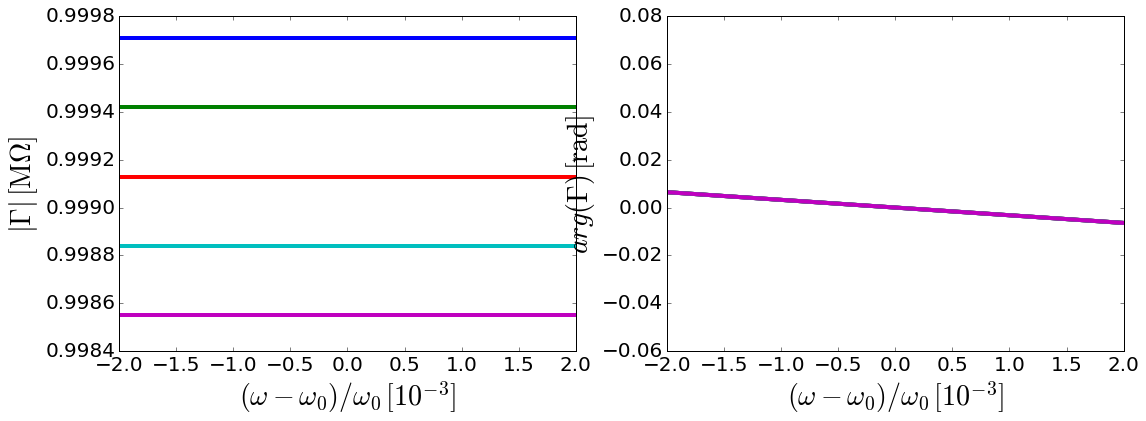

In [126]:
#uncoupled system: inductively dominated below f_0 and capacitively dominated above f_0

fig, axes = plt.subplots(1,2, sharex=True, figsize = (18,6))
for i in range(5):
    tau = (Z_in_LRC_P[i]-50.)/(Z_in_LRC_P[i]+50.)
    axes[0].plot((freq-fr)/(fr*10**(-3)), np.absolute(tau), lw = 4.)
    axes[1].plot((freq-fr)/(fr*10**(-3)), np.arctan(tau.imag/tau.real), label = 'R = {}'.format(R[i]), lw = 4.)
    #axes.axhline(R[i], ls = '-', lw = 1., color = 'black')
#axes.set_title(r'imaginary part input impedance')
axes[1].set_xlabel('$(\omega-\omega_0)/\omega_0 \, [10^{-3}]$', fontsize = labelsize )
axes[0].set_xlabel('$(\omega-\omega_0)/\omega_0 \, [10^{-3}]$', fontsize = labelsize )
axes[0].set_ylabel(r'$|\Gamma| \, [\mathrm{M\Omega}]$', fontsize = labelsize )
axes[1].set_ylabel(r'$arg(\Gamma)\,[\mathrm{rad}]$' ,  fontsize = labelsize )
axes[0].set_xlim(-0.5,0.5)
axes[1].set_xlim(-2.0,2.0)
#axes[1].axhline(0, ls = '-.', lw = 2., color = 'black')
#axes[1].tick_params(axis='y', which='major', labelsize=25)
#plt.setp(axes[1], yticks=[-np.pi/2, 0., np.pi/2.], yticklabels = [r'$-\frac{\pi}{2}$', '0',  r'$\frac{\pi}{2}$'])


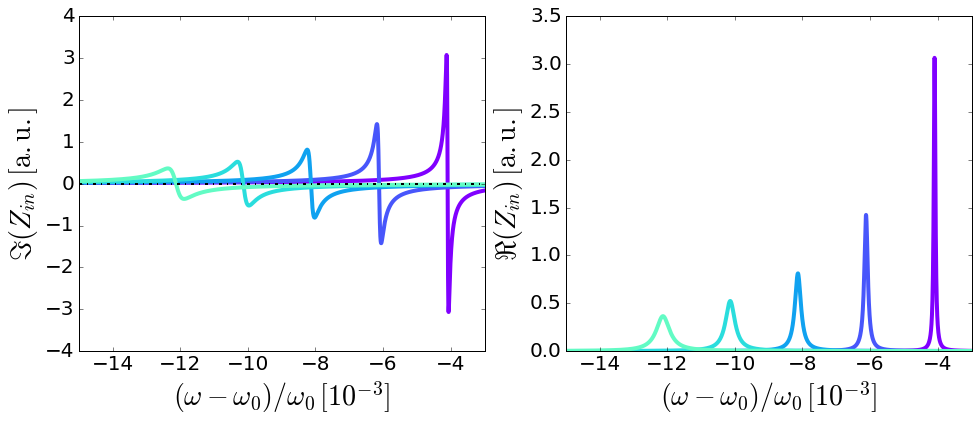

In [251]:
'''imaginary and real part input impedance coupled resonator different internal losses R + coupling'''
fig, axes = plt.subplots(1,2, sharex=True, figsize = (16,6))
norm = np.max(Z_in_LRC_P[0].imag)
norm_amp = np.max(Z_in_LRC_P[0].real)
for i in range(5):
    axes[0].plot((freq-fr)/(fr*10**(-3)), (Z_LRC_C[i]).imag/norm, lw = 4., color = c[i])
    axes[1].plot((freq-fr)/(fr*10**(-3)), (Z_LRC_C[i]).real/norm_amp, label = 'R = {}'.format(R[i]), lw = 4., color = c[i])
    #axes.axhline(R[i], ls = '-', lw = 1., color = 'black')
#axes.set_title(r'imaginary part input impedance')
axes[1].set_xlabel('$(\omega-\omega_0)/\omega_0 \, [10^{-3}]$', fontsize = labelsize )
axes[0].set_xlabel('$(\omega-\omega_0)/\omega_0 \, [10^{-3}]$', fontsize = labelsize )
axes[0].set_ylabel(r'$\Im(Z_{in}) \, [\mathrm{a.u.}]$', fontsize = labelsize )
axes[1].set_ylabel(r'$\Re(Z_{in})\, [\mathrm{a.u.}]$' ,  fontsize = labelsize )
#axes[0].set_ylim(-0.2,0.2)
#axes[0].set_xlim(-0.5,0.5)
axes[1].set_xlim(-15.0,-3.0)
axes[0].axhline(0, ls = '-.', lw = 2., color = 'black')
#plt.setp(axes, xticks=[10.53, 10.54, 10.55], xticklabels = ['10.53', '10.54', '10.55'])
#axes[0].set_xticks(range(3),[10.53,10.54,10.55], color = 'red')

In [256]:
#fr_s11 = res._fresc
fr_s11 = 1/(2.*np.pi*np.sqrt(res._Lr*(res._Cr+res._C_star)))

67281.8388941
56284.5609928
48377.2546239
42418.0297357
37765.9326404


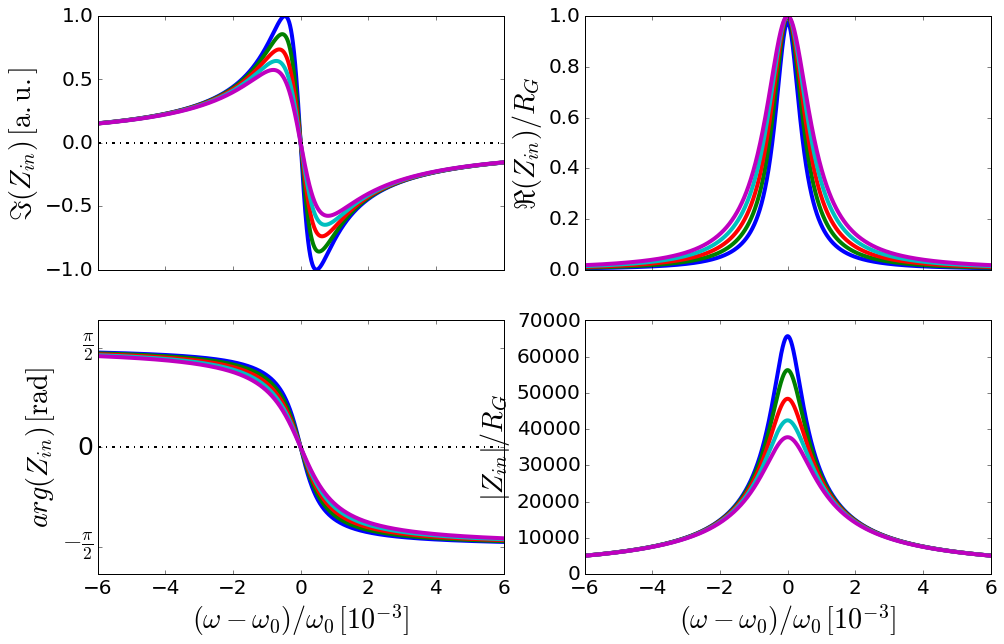

In [257]:
'''imaginary and real part input impedance (coupled resonator) different losses'''
fig, axes = plt.subplots(2,2, sharex=True, figsize = (16,10))
norm = np.max(Z_coupled[0].imag)
norm_amp = np.max(Z_coupled[0].real)
for i in range(5):
    Res = R[i]*res._Rstar/(R[i]+res._Rstar)
    print Res
    axes[0,0].plot((freq-fr_s11)/(fr_s11*10**(-3)), (Z_coupled[i]).imag/norm, lw = 4.)
    axes[0,1].plot((freq-fr_s11)/(fr_s11*10**(-3)), (Z_coupled[i]).real/Res, label = 'R = {}'.format(R[i]), lw = 4.)
    axes[1,1].plot((freq-fr_s11)/(fr_s11*10**(-3)), (np.absolute(Z_coupled[i])), lw = 4.)
    axes[1,0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.angle(Z_coupled[i]), label = 'R = {}'.format(R[i]), lw = 4.)
    #axes.axhline(R[i], ls = '-', lw = 1., color = 'black')
#axes.set_title(r'imaginary part input impedance')
axes[1,1].set_xlabel('$(\omega-\omega_0)/\omega_0 \, [10^{-3}]$', fontsize = labelsize )
axes[1,0].set_xlabel('$(\omega-\omega_0)/\omega_0 \, [10^{-3}]$', fontsize = labelsize )
axes[0,0].set_ylabel(r'$\Im(Z_{in}) \, [\mathrm{a.u.}]$', fontsize = labelsize )
axes[0,1].set_ylabel(r'$\Re(Z_{in})/R_G$' ,  fontsize = labelsize )
axes[1,1].set_ylabel(r'$|Z_{in}|/R_G$', fontsize = labelsize )
axes[1,0].set_ylabel(r'$arg(Z_{in})\,[\mathrm{rad}]$' ,  fontsize = labelsize )
axes[0,1].set_xlim(-4,4)
axes[1,1].set_xlim(-6,6)
axes[0,0].set_ylim(-1.0,1.0)
axes[1,1].axhline(50.)
axes[1,0].axhline(0, ls = '-.', lw = 2., color = 'black')
axes[0,0].axhline(0, ls = '-.', lw = 2., color = 'black')
axes[1,0].tick_params(axis='y', which='major', labelsize=25)
plt.setp(axes[1,0], yticks=[-np.pi/2, 0., np.pi/2.], yticklabels = [r'$-\frac{\pi}{2}$', '0',  r'$\frac{\pi}{2}$'])

#plt.setp(axes, xticks=[10.53, 10.54, 10.55], xticklabels = ['10.53', '10.54', '10.55'])
#axes[0].set_xticks(range(3),[10.53,10.54,10.55], color = 'red')

In [258]:
fig.savefig(str('input_impedance_coupled_diff_loss.pdf'), dpi = 400, bbox_inches='tight')

In [259]:
i = 4

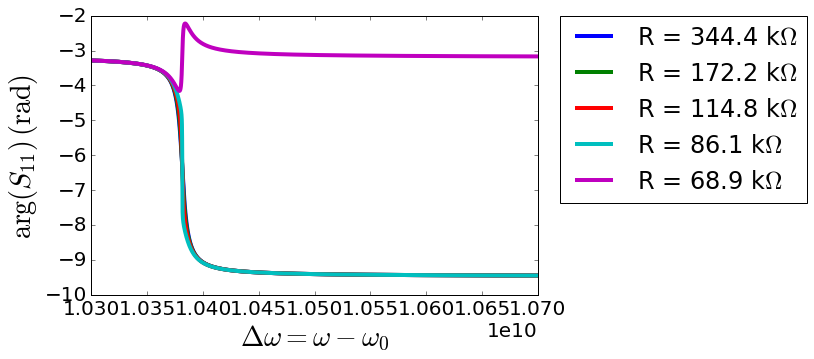

In [260]:
fig, axes = plt.subplots(figsize = (8,5))
for i in range(5):
    axes.plot(freq, np.unwrap(np.angle(S11_LRC_P[i])-np.pi), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
#axes.set_title(r'$\mathrm{arg}(S_{11})$')
axes.set_xlabel('$\Delta \omega = \omega-\omega_0$', fontsize = labelsize )
axes.set_ylabel(r'$\arg (S_{11}) \, (\mathrm{rad})$', fontsize = labelsize )
axes.set_xlim()
axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [261]:
fr_s11

10381313873.411594

(-2, 2)

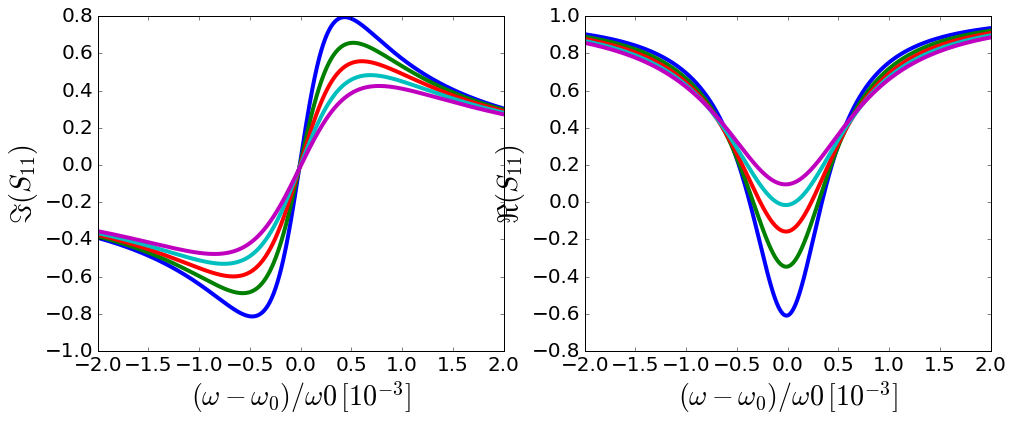

In [262]:
''' S11-parameter: real and imaginary part'''
fig, axes = plt.subplots(1,2, sharex=True, figsize = (16,6))
for i in range(5):
    axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3.)), S11_LRC_P[i].imag, label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
    axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3.)), S11_LRC_P[i].real, label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
    #axes.axhline(R[i], ls = '-', lw = 1., color = 'black')
#axes.set_title(r'imaginary part input impedance')
axes[1].set_xlabel('$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize )
axes[0].set_xlabel('$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize )
axes[0].set_ylabel(r'$\Im(S_{11})$', fontsize = labelsize )
axes[1].set_ylabel(r'$\Re(S_{11})$' ,  fontsize = labelsize )
#axes[0].set_ylim(-0.45,0.45)
axes[1].set_xlim(-2,2)

(-2, 2)

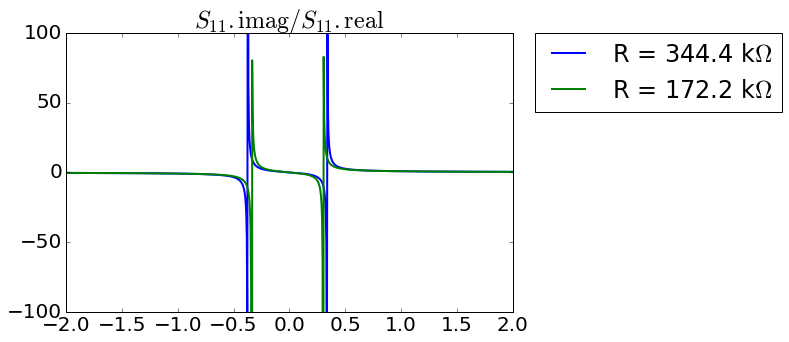

In [263]:
fig, axes = plt.subplots(figsize = (8,5))
for i in range(2):
    axes.plot((freq-fr_s11)/(fr_s11*10**(-3.)), S11_LRC_P[i].imag/S11_LRC_P[i].real, label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 2.)
axes.set_title(r'$S_{11}\mathrm{.imag}/S_{11}\mathrm{.real}$')
axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes.set_ylim(-100,100)
axes.set_xlim(-2,2)

(0, 1.0)

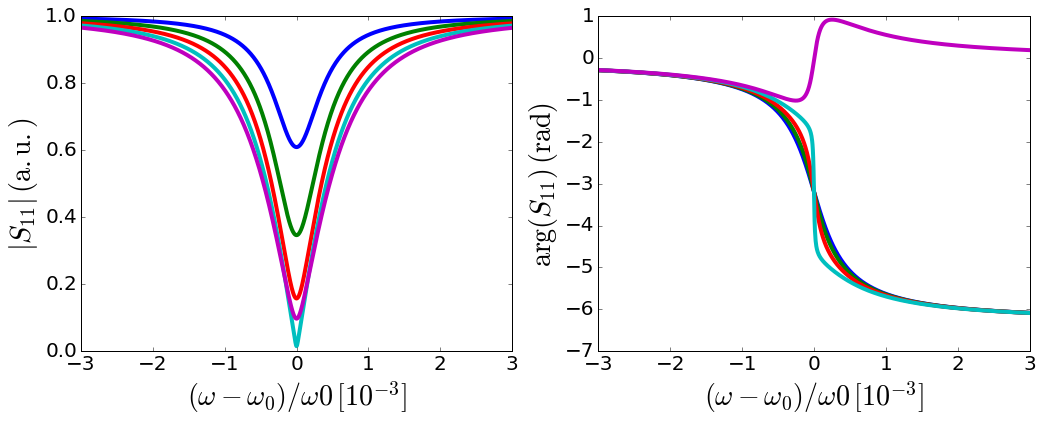

In [264]:
fig, axes = plt.subplots(nrows = 1, ncols=2,figsize = (17,6))
for i in range(5):
    axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(S11_LRC_P[i]), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
    axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(S11_LRC_P[i])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[0].set_ylabel(r'$|S_{11}|\,(\mathrm{a.u.})$', fontsize = labelsize)
axes[1].set_ylabel(r'$\arg (S_{11})\,(\mathrm{rad})$', fontsize = labelsize)
axes[0].set_xlabel(r'$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize)
axes[1].set_xlabel(r'$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize)
#axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].set_xlim(-3,3)
axes[1].set_xlim(-3,3)
axes[0].set_ylim(0,1.0)
#axes[1].set_ylim(-np.pi,np.pi)

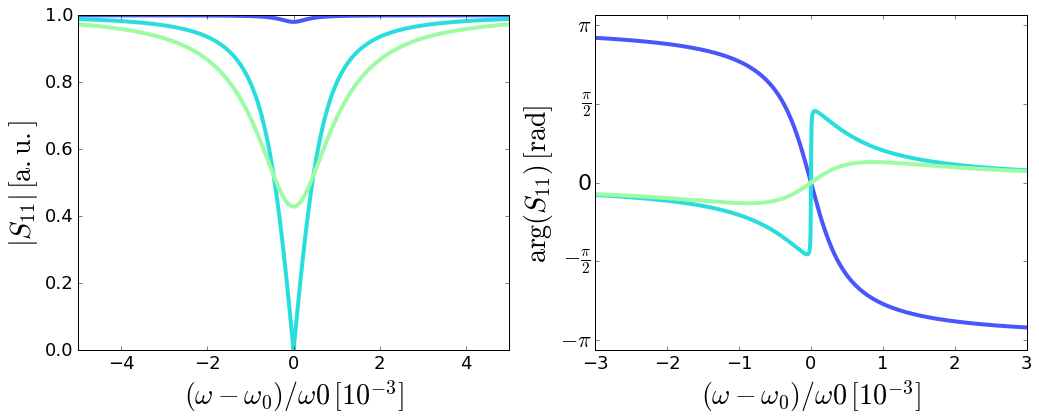

In [273]:
fig, axes = plt.subplots(nrows = 1, ncols=2,figsize = (17,6))

'''axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(S11_LRC_P[0]), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(S11_LRC_P[0])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(S11_LRC_P[3]), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(S11_LRC_P[3])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(S11_LRC_P[4]), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(S11_LRC_P[4])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)

'''
Q_ext = res._Qext
axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(res.S11_Q(freq,Q_ext/1.1, Q_ext,fr_s11)), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4., color = c[1])
axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(res.S11_Q(freq,Q_ext/1.1, Q_ext,fr_s11))), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4., color = c[1])
axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(res.S11_Q(freq,Q_ext/2., Q_ext, fr_s11)), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4., color = c[3])
axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(res.S11_Q(freq,Q_ext/2.01, Q_ext, fr_s11))-np.pi), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4., color = c[3])
axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(res.S11_Q(freq,Q_ext/3.5, Q_ext, fr_s11)), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4., color = c[5])
axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(res.S11_Q(freq,Q_ext/3.5, Q_ext, fr_s11))-np.pi), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4., color = c[5])



axes[0].set_ylabel(r'$|S_{11}|\,[\mathrm{a.u.}]$', fontsize = labelsize)
axes[1].set_ylabel(r'$\arg (S_{11})\,[\mathrm{rad}]$', fontsize = labelsize)
axes[0].set_xlabel(r'$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize)
axes[1].set_xlabel(r'$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize)
#axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].set_xlim(-5,5)
axes[1].set_xlim(-3,3)
axes[0].set_ylim(0,1.0)
axes[1].set_ylim(-np.pi-0.2,np.pi+0.2)
axes[1].tick_params(axis='y', which='major', labelsize=22)
plt.setp(axes[1], yticks=[-np.pi,-np.pi/2, 0., np.pi/2., np.pi], yticklabels = [r'$-\pi$',r'$-\frac{\pi}{2}$', '0',  r'$\frac{\pi}{2}$', r'$\pi$'])
#axes[1].set_ylim(-np.pi,np.pi)

In [271]:
fig.savefig(str('S11_coupled_regimes.pdf'), dpi = 400, bbox_inches='tight')

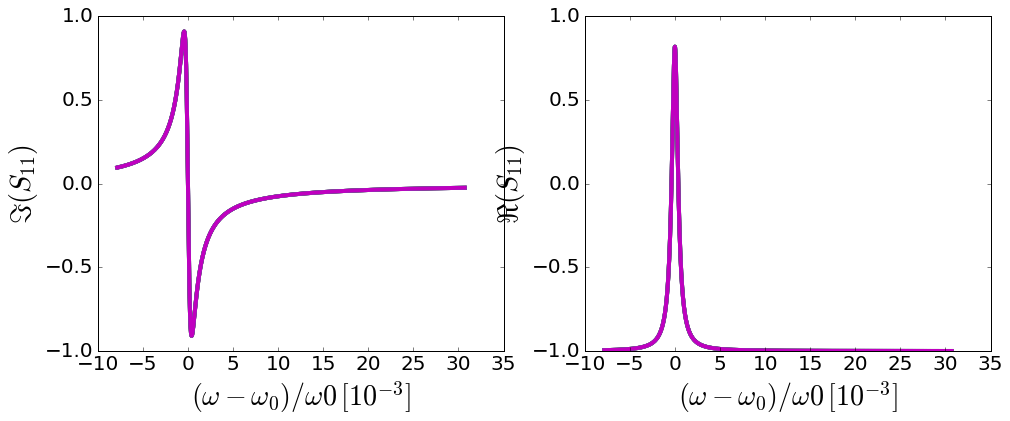

In [267]:
''' S11-parameter: real and imaginary part'''
fig, axes = plt.subplots(1,2, sharex=True, figsize = (16,6))
for i in range(5):
    axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3.)), res.S11_Q(freq,Q_ext/1.1, Q_ext, fr_s11).imag, label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
    axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3.)), res.S11_Q(freq,Q_ext/1.1, Q_ext, fr_s11).real, label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
    #axes.axhline(R[i], ls = '-', lw = 1., color = 'black')
#axes.set_title(r'imaginary part input impedance')
axes[1].set_xlabel('$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize )
axes[0].set_xlabel('$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize )
axes[0].set_ylabel(r'$\Im(S_{11})$', fontsize = labelsize )
axes[1].set_ylabel(r'$\Re(S_{11})$' ,  fontsize = labelsize )
#axes[0].set_ylim(-0.45,0.45)
#axes[1].set_xlim(-2,2)

In [268]:
f = np.arange(10.30e9,10.70e9,5.e5)

In [269]:
cf_1 = rf_p(f, res.S11_Q(f,Q_ext/1.1, Q_ext, fr_s11))
cf_2 = rf_p(f, res.S11_Q(f,Q_ext/2.0, Q_ext, fr_s11))
cf_3 = rf_p(f, res.S11_Q(f,Q_ext/3.5, Q_ext, fr_s11))

In [ ]:
slope1, amp_norm1, alpha1, fr1, Ql1, A21, frcal = cf_1.do_calibration(cf_1.f_data, cf_1.z_data_raw,'overcoupled')
z_data_norm1 = cf_1.do_normalization(cf_1.f_data, cf_1.z_data_raw, slope1, amp_norm1, alpha1, A21, fr1)

In [255]:
slope2, amp_norm2, alpha2, fr2, Ql2, A22, frcal = cf_2.do_calibration(cf_2.f_data, cf_2.z_data_raw,'undercoupled')
z_data_norm2 = cf_2.do_normalization(cf_2.f_data, cf_2.z_data_raw, slope2, amp_norm2, alpha2, A22, fr2)

NameError: name 'cf_2' is not defined

In [186]:
slope3, amp_norm3, alpha3, fr3, Ql3, A23, frcal = cf_3.do_calibration(cf_3.f_data, cf_3.z_data_raw,'undercoupled')
z_data_norm3 = cf_3.do_normalization(cf_3.f_data, cf_3.z_data_raw, slope3, amp_norm3, alpha3, A23, fr3)

fr (derivation) =  10382500000.0
theta0 (get delay) =  3.14159265768
agebraic r0: 0.285824799404
iterative r0: 0.285808924845
(-0.715120583234-0.000399055188102j)


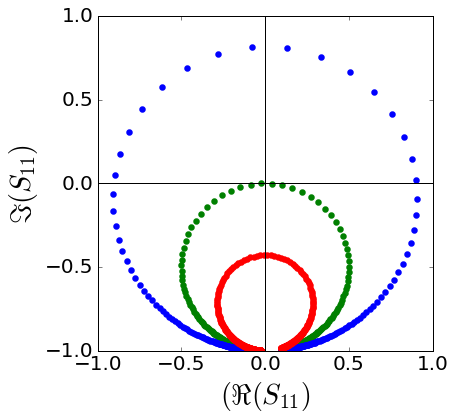

In [141]:
''' S11-parameter: real and imaginary part complex plane'''
fig, axes = plt.subplots(figsize = (6,6))
Q_ext = res._Qext
axes.scatter(res.S11_Q(f,Q_ext/2, Q_ext, fr_s11).imag, res.S11_Q(f,Q_ext/2, Q_ext, fr_s11).real , lw = 2., color = 'green')
axes.scatter(res.S11_Q(f,Q_ext/1.1, Q_ext, fr_s11).imag, res.S11_Q(f,Q_ext/1.1, Q_ext, fr_s11).real , lw = 2., color = 'blue')
axes.scatter(res.S11_Q(f,Q_ext/3.5, Q_ext, fr_s11).imag, res.S11_Q(f,Q_ext/3.5, Q_ext, fr_s11).real , lw = 2., color = 'red')
#axes.scatter((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(res.S11_Q(freq,Q_ext/1.1, Q_ext))), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
#axes.scatter((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(res.S11_Q(freq,Q_ext/2., Q_ext)), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
   #axes.axhline(R[i], ls = '-', lw = 1., color = 'black')
#axes.set_title(r'imaginary part input impedance')
axes.set_xlabel('$(\Re(S_{11})$', fontsize = labelsize )
axes.set_ylabel(r'$\Im(S_{11})$', fontsize = labelsize )
axes.set_ylim(-1.0,1.0)
axes.set_xlim(-1.0,1.0)
axes.axvline(0, color = 'black', lw = 1)
axes.axhline(0, color = 'black', lw = 1)

In [ ]:
fig.savefig(str('S11_coupled_regimes.pdf'), dpi = 400, bbox_inches='tight')

In [196]:
z_test = z_data_norm1*np.exp(1.j*10**(-8)*cf_1.f_data)

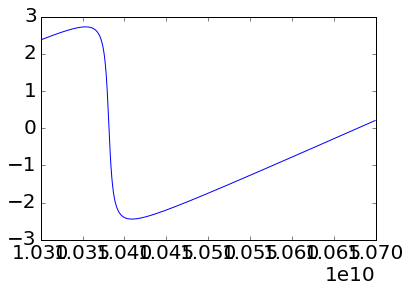

In [198]:
plt.plot(cf_1.f_data, np.angle(z_test))

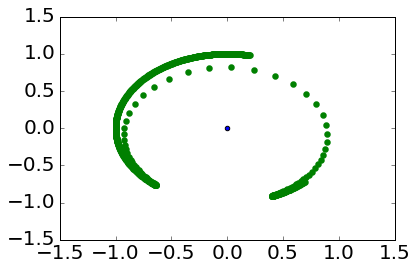

In [199]:
plt.scatter(z_test.imag, z_test.real , lw = 2., color = 'green')
plt.scatter(0,0)

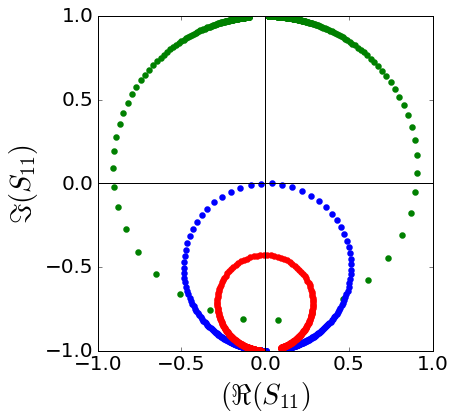

In [187]:
''' S11-parameter: real and imaginary part complex plane'''
fig, axes = plt.subplots(figsize = (6,6))
Q_ext = res._Qext
axes.scatter(z_data_norm1.imag, z_data_norm1.real , lw = 2., color = 'green')
axes.scatter(z_data_norm2.imag, z_data_norm2.real , lw = 2., color = 'blue')
axes.scatter(z_data_norm3.imag, z_data_norm3.real , lw = 2., color = 'red')
#axes.scatter((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(res.S11_Q(freq,Q_ext/1.1, Q_ext))), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
#axes.scatter((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(res.S11_Q(freq,Q_ext/2., Q_ext)), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
   #axes.axhline(R[i], ls = '-', lw = 1., color = 'black')
#axes.set_title(r'imaginary part input impedance')
axes.set_xlabel('$(\Re(S_{11})$', fontsize = labelsize )
axes.set_ylabel(r'$\Im(S_{11})$', fontsize = labelsize )
axes.set_ylim(-1.0,1.0)
axes.set_xlim(-1.0,1.0)
axes.axvline(0, color = 'black', lw = 1)
axes.axhline(0, color = 'black', lw = 1)

In [142]:
Q_ext = 2000.

In [143]:
cf_1 = rf_p(f, res.S11_Q(f,Q_ext/1.1, Q_ext, fr_s11))

C:\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


fr (derivation) =  10381500000.0
theta0 (get delay) =  -2.07204018191e-05


(2.0975328686521933e-12,
 [1.0017603435986802,
  -7.4468972398066385e-12,
  -0.22653580971152668,
  1.7116468579052381e-10,
  10381313926.544672,
  2005.2785479938777])

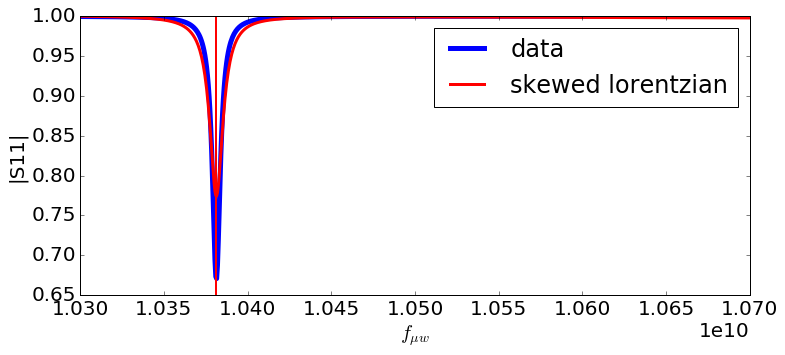

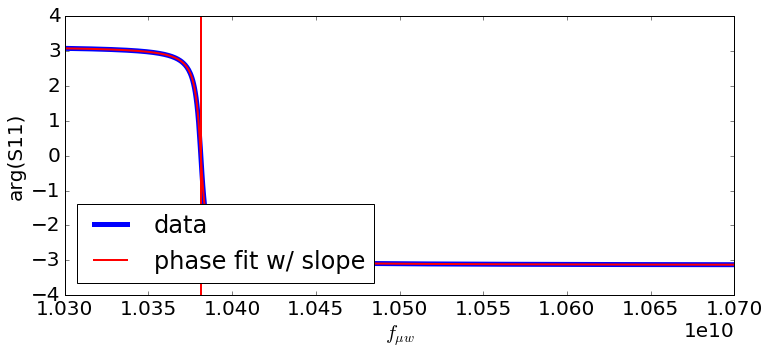

In [144]:
cf_1.get_delay(f,res.S11_Q(f,Q_ext/1.1, Q_ext, fr_s11), 'overcoupled',ignoreslope = False, plot = True)

C:\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 200.
  warnings.warn(errors[info][0], RuntimeWarning)


fr (derivation) =  10381500000.0
theta0 (get delay) =  -2.07213314104e-05
agebraic r0: 0.909090441857
iterative r0: 0.909090740809
(-0.0909089481545+1.18836276029e-08j)
agebraic r0: 0.909091046694
iterative r0: 0.909091046694
theta0 (circlefit) =  -3.14159955658
phi_0 = -6.84207615538e-06
Ql from phasefit is: 1818.2619078
slope :6.1604826126e-13


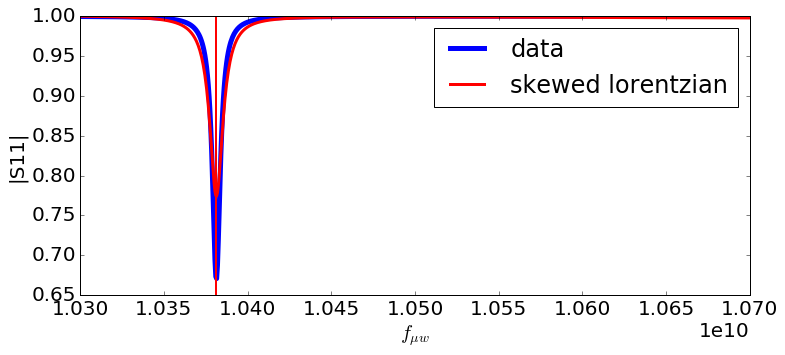

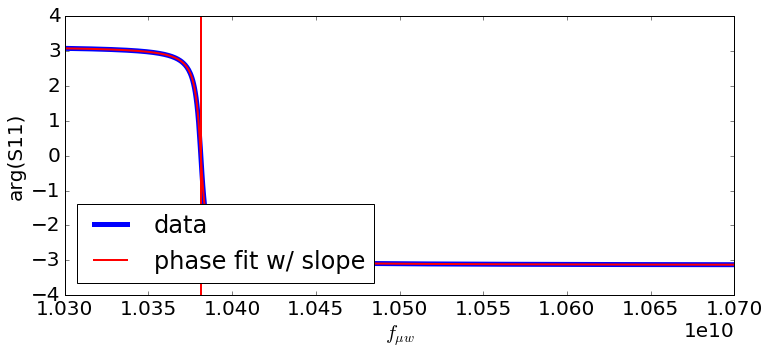

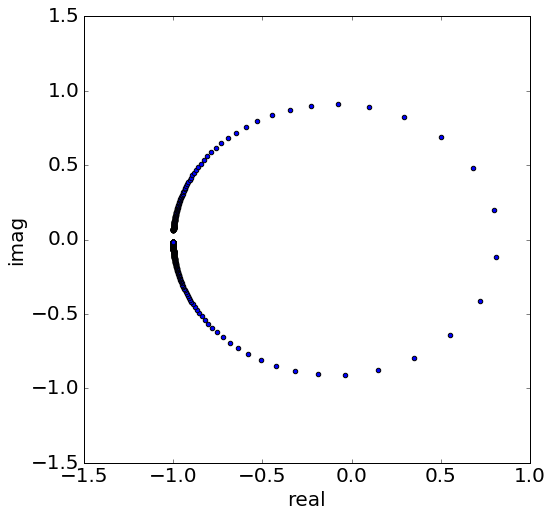

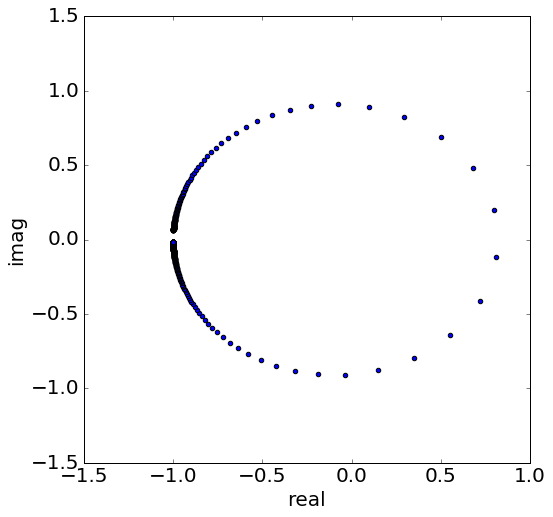

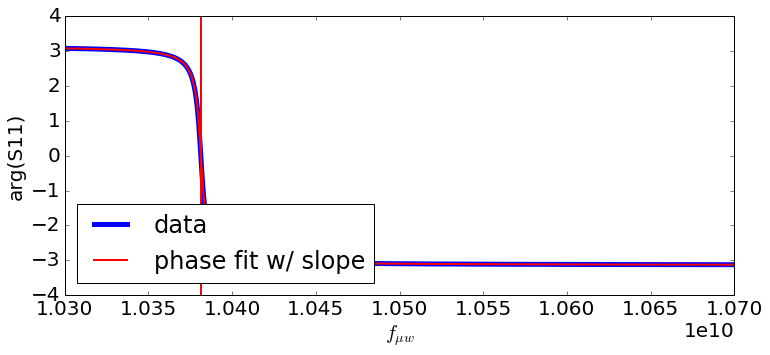

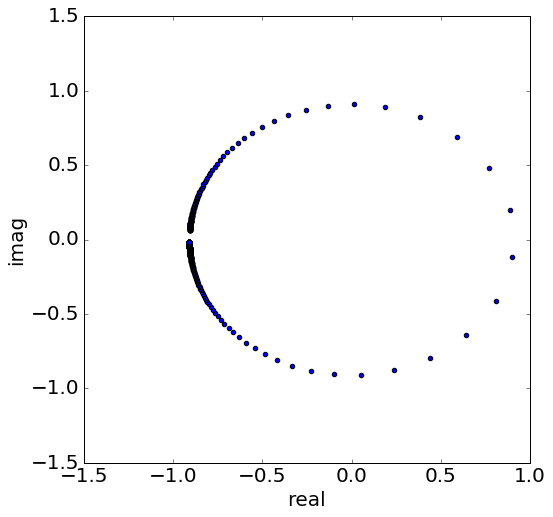

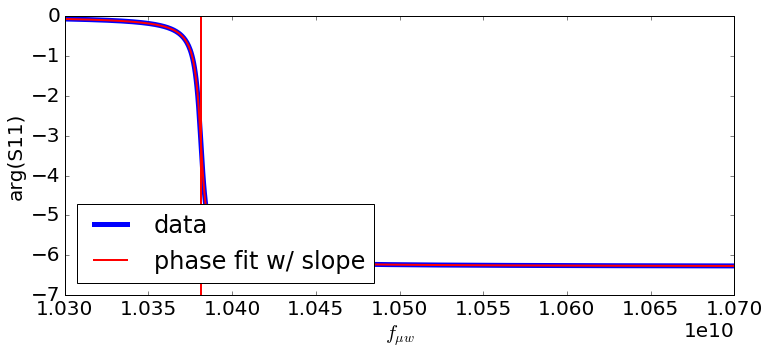

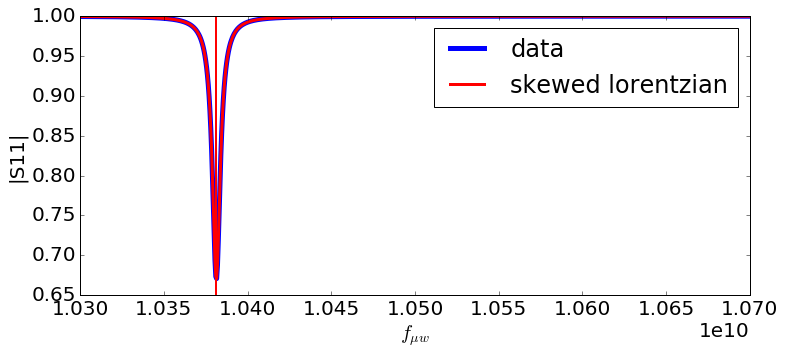

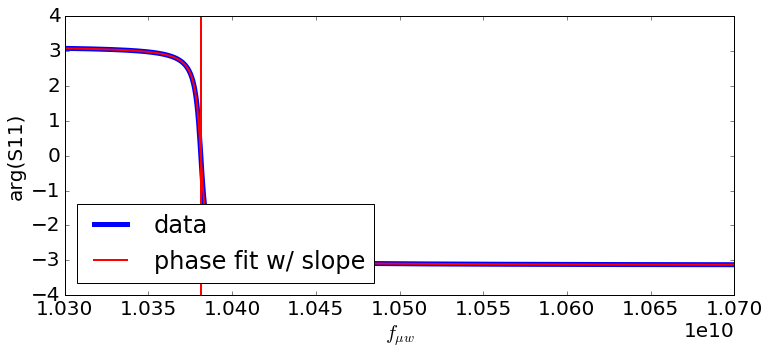

In [145]:
cf_1.autofit('overcoupled', plot = True)

In [146]:
cf_2 = rf_p(f, res.S11_Q(f,Q_ext/2., Q_ext, fr_s11))

fr (derivation) =  10381500000.0
theta0 (get delay) =  3.14159267795
agebraic r0: 0.500001871259
iterative r0: 0.500000120735
(-0.499999914783-1.83750140735e-07j)
agebraic r0: 0.499999982708
iterative r0: 0.499999982708
theta0 (circlefit) =  -5.09677705618e-07
phi_0 = -5.55654993294e-07
Ql from phasefit is: 999.999963796
slope :-2.63055881029e-16


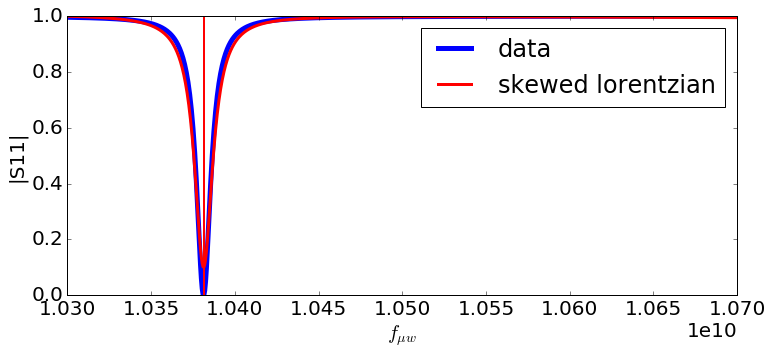

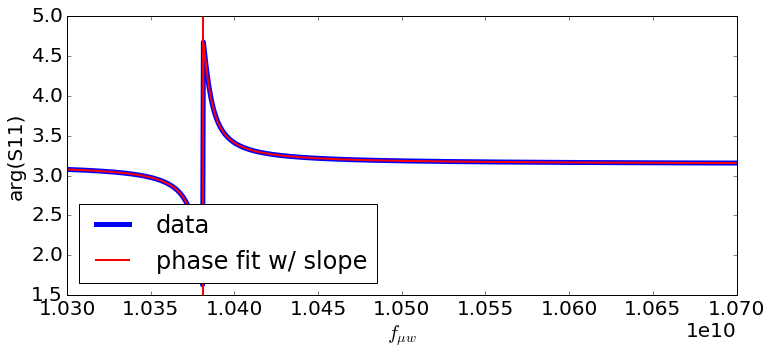

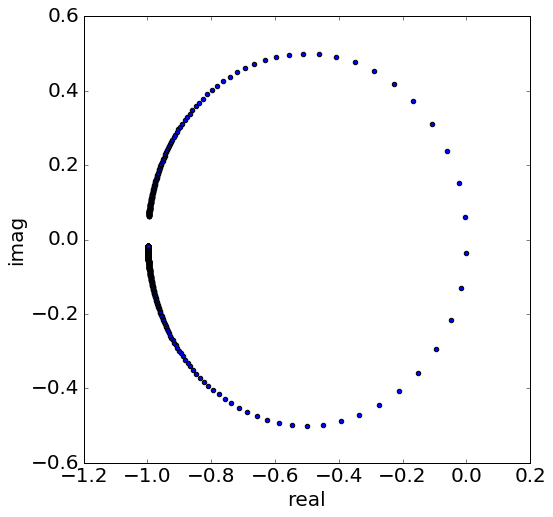

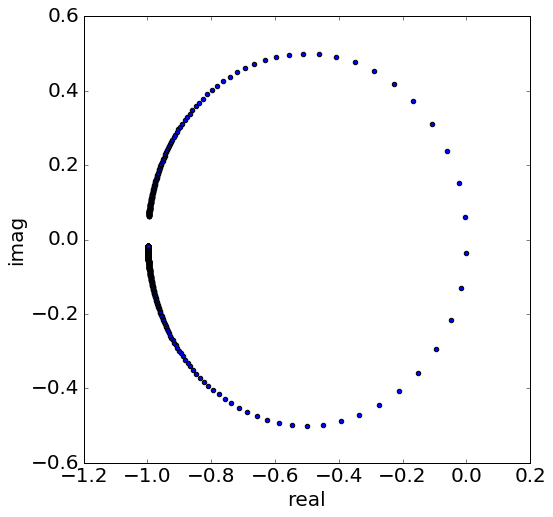

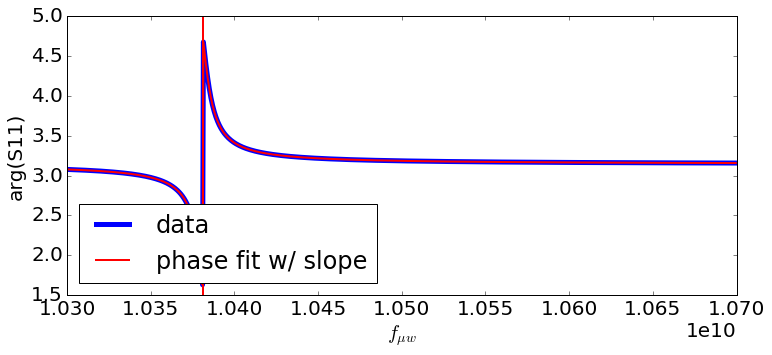

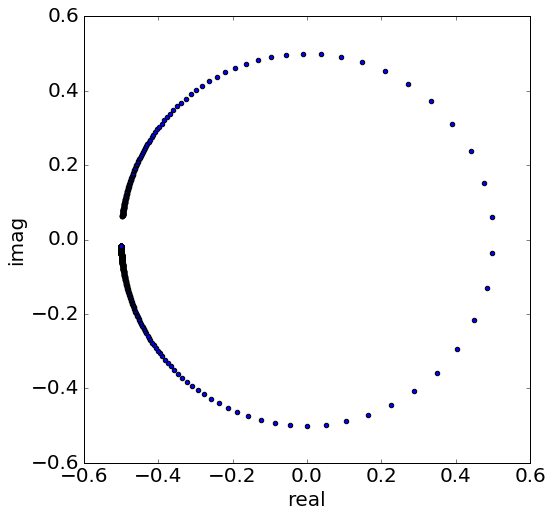

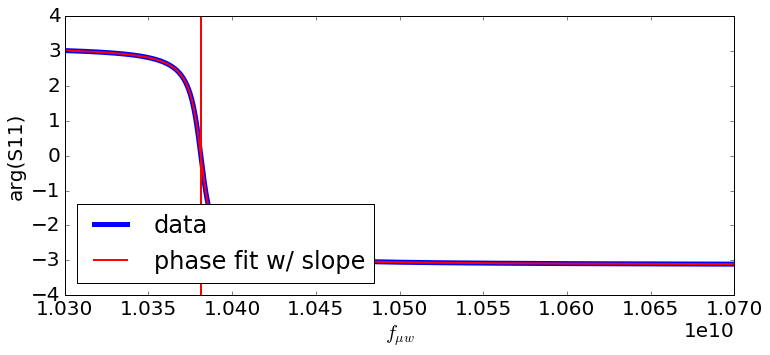

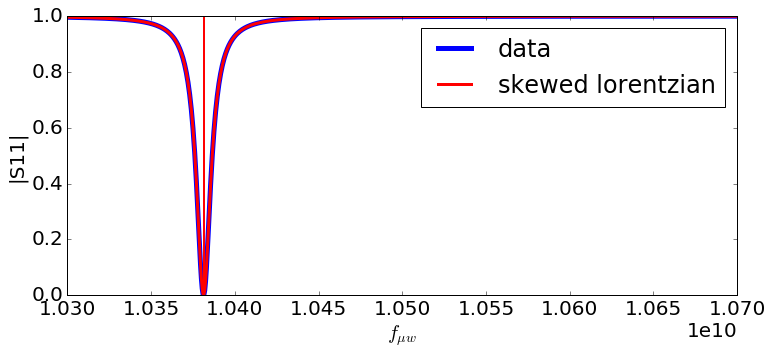

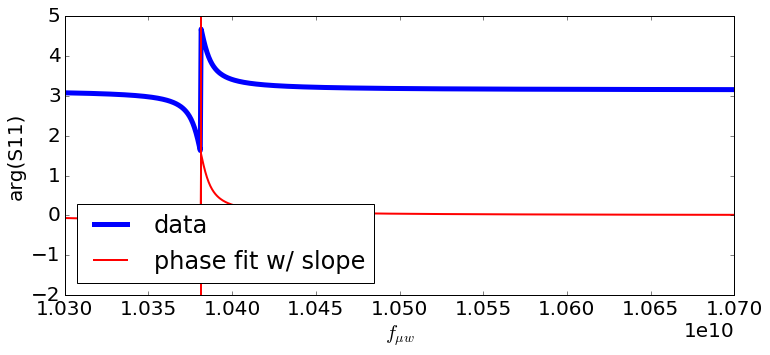

In [147]:
cf_2.autofit('undercoupled', plot = True, )

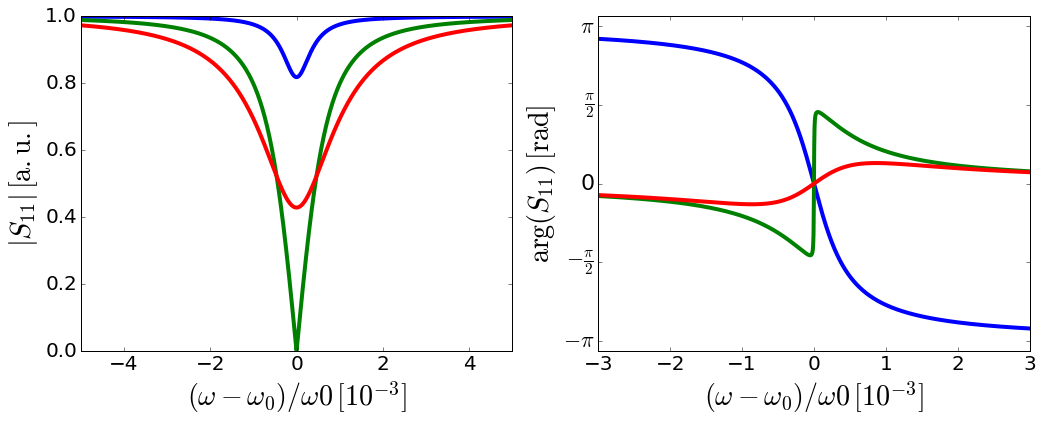

In [150]:
fig, axes = plt.subplots(nrows = 1, ncols=2,figsize = (17,6))

'''axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(S11_LRC_P[0]), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(S11_LRC_P[0])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(S11_LRC_P[3]), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(S11_LRC_P[3])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(S11_LRC_P[4]), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(S11_LRC_P[4])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)

'''
Q_ext = res._Qext
axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(res.S11_Q(freq,Q_ext/1.1, Q_ext, fr_s11)), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(res.S11_Q(freq,Q_ext/1.1, Q_ext, fr_s11))), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(res.S11_Q(freq,Q_ext/2., Q_ext, fr_s11)), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(res.S11_Q(freq,Q_ext/2.01, Q_ext, fr_s11))-np.pi), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[0].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.absolute(res.S11_Q(freq,Q_ext/3.5, Q_ext, fr_s11)), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
axes[1].plot((freq-fr_s11)/(fr_s11*10**(-3)), np.unwrap(np.angle(res.S11_Q(freq,Q_ext/3.5, Q_ext, fr_s11))-np.pi), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)



axes[0].set_ylabel(r'$|S_{11}|\,[\mathrm{a.u.}]$', fontsize = labelsize)
axes[1].set_ylabel(r'$\arg (S_{11})\,[\mathrm{rad}]$', fontsize = labelsize)
axes[0].set_xlabel(r'$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize)
axes[1].set_xlabel(r'$(\omega-\omega_0)/\omega0 \, [10^{-3}]$', fontsize = labelsize)
#axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].set_xlim(-5,5)
axes[1].set_xlim(-3,3)
axes[0].set_ylim(0,1.0)
axes[1].set_ylim(-np.pi-0.2,np.pi+0.2)
axes[1].tick_params(axis='y', which='major', labelsize=22)
plt.setp(axes[1], yticks=[-np.pi,-np.pi/2, 0., np.pi/2., np.pi], yticklabels = [r'$-\pi$',r'$-\frac{\pi}{2}$', '0',  r'$\frac{\pi}{2}$', r'$\pi$'])
#axes[1].set_ylim(-np.pi,np.pi)

In [ ]:
i = 3

In [ ]:
fig, axes = plt.subplots(figsize = (8,5))
cf_test = rf_p(freq, S11_LRC_P[i])
Cc = 4.5e-15
wresc = 1/np.sqrt(res._Lr*(res._Cr+Cc))    
Q_ext = res.Q_ext(wresc, Cc, own = False)
Q_int = wresc*R[i]*res._Cr
ratio = Q_ext/Q_int
print ratio
if ratio < 1:
    coupling = 'overcoupled'
else:
    coupling = 'undercoupled'
cf_test.autofit(coupling)
axes.plot(freq, np.unwrap(np.angle(S11_LRC_P[i])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 2.)
axes.plot(freq, np.unwrap(np.angle(cf_test.z_data_sim)), label = 'fit')
axes.set_title(r'$\mathrm{arg}(S_{11})$')
axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
plt.plot(freq, np.unwrap(np.angle(S11_LRC_P[i])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
Z_input = Z_CC+Z_in_LRC_P[i]
plt.plot(freq,np.unwrap(np.arctan(-2.*50.*Z_input.imag/(50.**2.-Z_input.real**2.-Z_input.imag**2.))), lw = 5.)
fr = wresc/(2.*np.pi)
deltaf = freq-fr
Ql = (1/Q_int+1/Q_ext)**(-1)
S11_sebastian = (2.*Ql/Q_ext - 1. + 2j*Ql*(fr-freq)/fr ) / ( 1. - 2j*Ql*(fr-freq)/fr )
plt.plot(freq, np.arctan(fr*deltaf/Q_ext/(deltaf**2.+0.25*(fr/Ql)**2.*(1-2*Ql/Q_ext)))+np.pi, color = 'yellow', lw = 2.)
#plt.plot(freq, np.arctan(4*Ql*deltaf/(fr*(2*Ql-Q_ext-4*Ql**2.*Q_ext*deltaf**2./fr**2.)) ), color = 'black' )
plt.plot(freq, np.arctan(S11_sebastian.imag/S11_sebastian.real))
print Q_ext, Q_int, Ql
print fr

In [ ]:
cf_test.plot_complexe(S11_LRC_P[4])

In [ ]:
dev = cf_test._derivation(freq, S11_LRC_P[i])

In [ ]:
plt.plot(freq, dev)

In [ ]:
fr_dev = freq[np.argmin(dev)]

In [ ]:
theta0_uc, fr_uc, Q_ext_uc, Ql_uc, slope_uc = cf_test._phase_fit_undercoupled(freq,S11_LRC_P[i], None, 1000., fr_dev, 10000., 0.)

In [ ]:
print theta0_uc, fr_uc, Q_ext_uc, Ql_uc, slope_uc

In [ ]:
np.max(np.unwrap(np.angle(S11_LRC_P[i])-theta0_uc))-np.min(np.unwrap(np.angle(S11_LRC_P[i])-theta0_uc))

In [ ]:
np.pi*Ql/(Q_int-Q_ext)

In [ ]:
plt.plot(freq, np.unwrap(np.angle(S11_LRC_P[i])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 4.)
plt.plot(freq, np.arctan(fr_uc*deltaf/Q_ext_uc/(deltaf**2.+0.25*(fr_uc/Ql_uc)**2.*(1-2*Ql_uc/Q_ext_uc)))+theta0_uc-slope_uc*(freq-fr), color = 'yellow', lw = 2.)
#plt.axhline(np.pi*Q_int/(2.*Q_ext))


In [ ]:
print Q_ext_uc, Ql_uc, fr_uc, theta0_uc
print Ql

In [ ]:
plt.plot(freq, np.arctan(fr_uc*deltaf/Q_ext_uc/(deltaf**2.+0.25*(fr_uc/Ql_uc)**2.*(1-2*Ql_uc/Q_ext_uc)))+theta0_uc, color = 'yellow', lw = 2.)
Q_ext_a = Q_ext
plt.plot(freq, np.arctan(fr_uc*deltaf/Q_ext_a/(deltaf**2.+0.25*(fr_uc/Ql_uc)**2.*(1-2*Ql_uc/Q_ext_a)))+theta0_uc, color = 'black', lw = 2.)

In [ ]:
freq = np.arange(10.40e9, 10.48e9, 1.e5)

In [ ]:
Z_in_LRC_P = []
S11_LRC_P = []
R = []
for i in range(5):
    
    R.append(res._Rr/(i*25+1))
    Z_in_LRC_P.append(res.Z_in_LRC_P(freq, res._Lr, res._Cr, R[i] ))
    #plt.figure(figsize = (8,4))
    #fig, axes = plt.subplots(figsize = (8,4))
    #axes.plot(freq, Z_in_LRC_P.imag)
    #axes.set_ylim(-100000,100000)
    Cc = 4.5e-15
    print Cc
    Z_CC = 1./(1.j*2.*np.pi*freq*Cc)
    S11_LRC_P.append(res.S11_LRC(freq, Z_CC+Z_in_LRC_P[i], 50. ))
    wresc = 1/np.sqrt(res._Lr*(res._Cr+Cc))
    Q_ext = res.Q_ext(wresc, Cc, own = False)
    print 'Q_ext = {}'.format(Q_ext)
    Q_int = wresc*R[i]*res._Cr
    print 'Q_int = {}'.format(Q_int)
    ratio = Q_ext/Q_int
    print 'Q_ext/Q_int = {}'.format(str(ratio)) 

In [ ]:
i = 4

In [ ]:
slope = -5*10**(-8)

In [ ]:
fig, axes = plt.subplots(figsize = (8,5))
z_data_raw = S11_LRC_P[i]*np.exp(1.j*(slope*(freq-fr)-np.pi))
cf_test = rf_p(freq, z_data_raw)
Cc = 4.5e-15
wresc = 1/np.sqrt(res._Lr*(res._Cr+Cc))    
Q_ext = res.Q_ext(wresc, Cc, own = False)
Q_int = wresc*R[i]*res._Cr
ratio = Q_ext/Q_int
print ratio
if ratio < 1:
    coupling = 'overcoupled'
else:
    coupling = 'undercoupled'
cf_test.autofit(coupling)
axes.plot(freq, np.unwrap(np.angle(z_data_raw)), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 2.)
axes.plot(freq, np.unwrap(np.angle(cf_test.z_data_sim)), label = 'fit')
axes.set_title(r'$\mathrm{arg}(S_{11})$')
axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
coupling = 'undercoupled'
delay, params = cf_test.get_delay(freq, S11_LRC_P[i], coupling, ignoreslope = False, plot = True )
print delay, params
slope, amp_norm, alpha, fr, Ql, A2, frcal = cf_test.do_calibration(freq,S11_LRC_P[i], coupling, ignoreslope = True, guessdelay = True, plot = True)
print 'slope:', slope
print 'alpha:', alpha
z_data_uc = cf_test.do_normalization(freq,S11_LRC_P[i],slope,amp_norm,alpha,A2,fr)
cf_test.plot_complexe(z_data_uc)
xc, yc, r0 = cf_test._fit_circle(z_data_uc)
print 'xc, yc, r0', xc, yc, r0
fitresults = cf_test.circlefit(freq,z_data_uc, coupling, refine_results = True, calc_errors=False)
print fitresults
z_data_sim_uc = cf_test._S11_directrefl(freq,fr=fitresults["fr"],Ql=fitresults["Ql"],Qc=cf_test._Q_ext,a=amp_norm,alpha=alpha,delay=slope, phi_0 = fitresults["phi_0"])
z_data_sim_uc = np.absolute(np.sqrt(np.absolute(np.absolute(z_data_sim_uc)**2.+A2*(freq-fr))))*np.exp(1.j*(np.angle(z_data_sim_uc)+cf_test._theta0))
cf_test.plot_complexe(z_data_sim_uc)


In [ ]:
cf_test._theta0

In [ ]:
cf_test._periodic_boundary(cf_test._theta0+np.pi,np.pi )

In [ ]:
theta0 = 6.21

In [ ]:
if theta0 > np.pi or theta0 < np.pi: print cf_test._periodic_boundary(6.21,np.pi )

In [ ]:
cf_test._periodic_boundary(np.angle(cf_test._offrespoint)+np.pi,np.pi)

In [ ]:
cf_test._offrespoint

In [ ]:
fig, axes_oc = plt.subplots(figsize = (8,5))
fig, axes_uc = plt.subplots(figsize = (8,5))
for i in range(5):
    cf_test = rf_p(freq, S11_LRC_P[i])
    Cc = 4.5e-15
    wresc = 1/np.sqrt(res._Lr*(res._Cr+Cc))
    Q_ext = res.Q_ext(wresc, Cc, own = False)
    Q_int = wresc*R[i]*res._Cr
    ratio = Q_ext/Q_int
    print ratio

    if ratio < 1:
        cf_test.autofit(coupling = 'overcoupled', plot = True)
        axes_oc.plot(freq, np.unwrap(np.angle(S11_LRC_P[i])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 5.)
        axes_oc.plot(freq, np.unwrap(np.angle(cf_test.z_data_sim)), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), color = 'yellow', lw = 2.)
    else:
        overcoupled = False
        coupling = 'undercoupled'
        theta0_uc, fr_uc, Q_ext_uc, Ql_uc, slope_uc = cf_test._phase_fit_undercoupled(freq,S11_LRC_P[i], None, 1000., fr_dev, 10000.,0.)
        print theta0_uc, fr_uc, Q_ext_uc, Ql_uc, slope_uc
        axes_uc.plot(freq, np.unwrap(np.angle(S11_LRC_P[i]*np.exp(1.j*np.pi))), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 5.)
        #axes_uc.plot(freq, np.arctan(fr_uc*deltaf/Q_ext_uc/(deltaf**2.+0.25*(fr_uc/Ql_uc)**2.*(1-2*Ql_uc/Q_ext_uc)))+theta0_uc, color = 'yellow',  lw = 2.)
        cf_test.autofit(coupling, plot = True)
        axes_uc.plot(freq, np.unwrap(np.angle(cf_test.z_data_sim)), color = 'yellow', lw = 2)
        #slope, amp_norm, alpha, fr, Ql, A2, frcal = cf_test.do_calibration(freq,S11_LRC_P[i], coupling = 'undercoupled', ignoreslope = True, guessdelay = True, plot = True)
        #z_data_uc = cf_test.do_normalization(freq,S11_LRC_P[i],slope,amp_norm,alpha,A2,fr)
        #fitresults = cf_test.circlefit(freq,S11_LRC_P[i], coupling, fr, Ql, refine_results = True, calc_errors=False)
        #z_data_sim_uc = cf_test._S11_directrefl(freq,fr=fitresults["fr"],Ql=fitresults["Ql"],Qc=fitresults["Qc"],a=amp_norm,alpha=alpha,delay=slope, phi_0 = fitresults["phi_0"])
        #z_data_sim_uc = np.absolute(np.sqrt(np.absolute(np.absolute(z_data_sim_uc)**2.+A2*(freq-fr))))*np.exp(1.j*(np.angle(z_data_sim_uc)+theta0_uc))
        #cf_test.plot_complexe(z_data_sim_uc)
        #plt.plot(freq, np.unwrap(np.angle(z_data_sim_uc)))
#axes.plot(freq, np.unwrap(np.angle(S11_LRC_P[i])), label = r'R = {} k$\Omega$'.format(mt.ceil(R[i]/1000*10)/10), lw = 2.)
    
axes_uc.set_title(r'$\mathrm{arg}(S_{11})$')
axes_uc.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes_oc.set_title(r'$\mathrm{arg}(S_{11})$')
axes_oc.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# circle fit:

In [ ]:
f_dat = np.arange(10.425e9, 10.475e9, 1.e4)

In [ ]:
f_dat.shape

In [ ]:
Cc = 4.5e-15

In [ ]:
res.set_couplingc(Cc)

In [ ]:
res.S11(f_dat)

In [ ]:
S11 = np.array(res._S11)

In [ ]:
S11*np.exp(1.j*np.pi)

In [ ]:
cf = rf_p(f_dat, S11*np.exp(1.j*np.pi))

In [ ]:
cf.autofit(coupling = 'overcoupled', plot = True)

In [ ]:
cf._phi0

In [ ]:
cf._theta0

In [ ]:
res._Lr

In [ ]:
def Z_i(f, L):
    w = 2.*np.pi*f
    return 1.j*w*L + 1./(1./res._Rr+1./(1.j*w*res._Lr)+1.j*w*res._Cr)

In [ ]:
def S11(Z_i,Z0):
    return (Z_i-Z0)/(Z_i+Z0)

# Sebastians model: 

In [ ]:
f_dat_seb = np.arange(10.48e9, 10.52e9, 1.e5)

In [ ]:
S11_seb = res._S11_seb(f_dat_seb)

In [ ]:
phase = (np.angle(S11_seb))

In [ ]:
mag = res.mag(S11_seb)

In [ ]:
res.plot(f_dat_seb,phase)
res.plot(f_dat_seb,mag)

In [ ]:
cf2 = rf_p(f_dat_seb, S11_seb)

In [ ]:
cf2.autofit(coupling = 'overcoupled', plot=True)

In [ ]:
cf2.plot_complexe(cf2.z_data)